# Get Data

In [2]:
import numpy as np

# Define the file path
file_path = "../../../MLTM/CSO/test-label.dat"  # Replace with the actual path to your file

# Read data from the file and convert it into true_labels
true_labels = []
with open(file_path, "r") as file:
    for line in file:
        line = line.strip()  # Remove leading/trailing white spaces
        line_data = list(map(int, line.split()))  # Split and convert to integers
        true_labels.append(line_data)

# Convert the list of lists into a numpy array
true_labels = np.array(true_labels)

In [3]:
true_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
len(true_labels)

771

In [5]:
import numpy as np

# Define the file path
file_path = "../../../MLTM/CSO/1/1//dir/testfinal.b"  # Replace with the actual path to your file

# Read data from the file and convert it into true_labels
predicted_probs = []
with open(file_path, "r") as file:
    for line in file:
        line = line.strip()  # Remove leading/trailing white spaces
        line_data = list(map(float, line.split()))  # Split and convert to integers
        predicted_probs.append(line_data)

# Convert the list of lists into a numpy array
predicted_probs = np.array(predicted_probs)


In [6]:
predicted_probs.shape

(771, 17)

In [7]:
import numpy as np

# Define the file path
file_path = "cso_predicted_probs.txt"  # Replace with the actual path to your file

# Read data from the file and convert it into true_labels
bert_probs = []
with open(file_path, "r") as file:
    for line in file:
        line = line.strip()  # Remove leading/trailing white spaces
        line_data = list(map(float, line.split()))  # Split and convert to integers
        bert_probs.append(line_data)

# Convert the list of lists into a numpy array
bert_probs = np.array(bert_probs)


In [8]:
len(bert_probs)

771

In [9]:
threshold = 0.5 

# Convert to binary array using the threshold
predicted_labels = (predicted_probs >= threshold).astype(int)
bert_labels = (bert_probs >= threshold).astype(int)

In [10]:
predicted_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
bert_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# AGreement

In [12]:
true_labels.shape

(771, 17)

In [13]:
predicted_labels.shape

(771, 17)

In [14]:
bert_labels.shape

(771, 17)

In [15]:
print(len(true_labels))
print(len(predicted_labels))
print(len(bert_labels))


771
771
771


In [16]:
true_data = []
pred_data = []
bert_data = []

for i, (true_row, pred_row, bert_row) in enumerate(zip(true_labels, predicted_labels, bert_labels)):
    true_indices = frozenset(index for index, value in enumerate(true_row) if value == 1)
    pred_indices = frozenset(index for index, value in enumerate(pred_row) if value == 1)
    bert_indices = frozenset(index for index, value in enumerate(bert_row) if value == 1)
    
    true_data.append(["1", i, true_indices])
    pred_data.append(["2", i, pred_indices])
    bert_data.append(["3", i, bert_indices])
    

In [17]:
import nltk
from nltk.metrics import masi_distance, binary_distance

In [18]:
mltm_agreement = nltk.agreement.AnnotationTask(data=true_data+pred_data, distance=binary_distance)
print(mltm_agreement.kappa())

0.33071868818921474


In [19]:
bert_agreement = nltk.agreement.AnnotationTask(data=true_data+bert_data, distance=binary_distance)
print(bert_agreement.kappa())

0.8055178496247151


# MLTM

In [20]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(true_labels, predicted_labels)


array([[[719,   0],
        [ 52,   0]],

       [[755,   0],
        [ 12,   4]],

       [[698,   3],
        [ 45,  25]],

       [[686,   8],
        [ 46,  31]],

       [[698,   3],
        [ 23,  47]],

       [[738,   4],
        [ 17,  12]],

       [[767,   0],
        [  4,   0]],

       [[712,   2],
        [ 42,  15]],

       [[762,   0],
        [  9,   0]],

       [[752,   0],
        [ 19,   0]],

       [[695,   4],
        [ 52,  20]],

       [[729,   0],
        [ 36,   6]],

       [[685,   1],
        [ 63,  22]],

       [[731,   0],
        [ 16,  24]],

       [[690,   3],
        [ 18,  60]],

       [[723,   1],
        [ 41,   6]],

       [[739,   0],
        [ 32,   0]]])

In [21]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       1.00      0.25      0.40        16
           2       0.89      0.36      0.51        70
           3       0.79      0.40      0.53        77
           4       0.94      0.67      0.78        70
           5       0.75      0.41      0.53        29
           6       0.00      0.00      0.00         4
           7       0.88      0.26      0.41        57
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00        19
          10       0.83      0.28      0.42        72
          11       1.00      0.14      0.25        42
          12       0.96      0.26      0.41        85
          13       1.00      0.60      0.75        40
          14       0.95      0.77      0.85        78
          15       0.86      0.13      0.22        47
          16       0.00      0.00      0.00        32

   micro avg       0.90   

/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:

from sklearn.metrics import classification_report, accuracy_score, hamming_loss

# Assuming you have true_labels and predicted_labels defined
# Calculate classification report using macro-averaging
report = classification_report(
    true_labels,
    predicted_labels,
    output_dict=True
)

accuracy = accuracy_score(true_labels, predicted_labels)
h_loss = hamming_loss(true_labels, predicted_labels)

# Extract micro-averaged precision, recall, and F1-score
micro_precision = report['micro avg']['precision']
micro_recall = report['micro avg']['recall']
micro_f1 = report['micro avg']['f1-score']

# Extract macro-averaged precision, recall, and F1-score
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1 = report['macro avg']['f1-score']

# Print the results
print(f"Micro Precision: {micro_precision:.2f}")
print(f"Micro Recall: {micro_recall:.2f}")
print(f"Micro F1-Score: {micro_f1:.2f}")
print(f"Macro Precision: {macro_precision:.2f}")
print(f"Macro Recall: {macro_recall:.2f}")
print(f"Macro F1-Score: {macro_f1:.2f}")

print(f"Accuracy: {accuracy:.2f}")
print(f"Hamming Loss: {h_loss:.2f}")

def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

print('Hamming score: {0}'.format(hamming_score(true_labels, predicted_labels))) # 0.375 (= (0.5+1+0+0)/4)

Micro Precision: 0.90
Micro Recall: 0.34
Micro F1-Score: 0.49
Macro Precision: 0.64
Macro Recall: 0.27
Macro F1-Score: 0.36
Accuracy: 0.35
Hamming Loss: 0.04
Hamming score: 0.3527885862516213


/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Draw AUROC

In [23]:
import numpy as np
from sklearn.metrics import roc_auc_score


# Calculate ROC AUC for each class and skip classes with only one class in y_true
roc_auc_scores = []
for i in range(true_labels.shape[1]):
    if len(np.unique(true_labels[:, i])) > 1:
        roc_auc = roc_auc_score(true_labels[:, i], predicted_probs[:, i])
        roc_auc_scores.append(roc_auc)

# Calculate micro and macro average ROC AUC
micro_roc_auc = roc_auc_score(true_labels.ravel(), predicted_probs.ravel(), average='micro')
macro_roc_auc = np.mean(roc_auc_scores)

print("ROC AUC Scores for Each Class:")
for i, score in enumerate(roc_auc_scores):
    print(f"Class {i}: {score:.4f}")

print(f"Micro ROC AUC: {micro_roc_auc:.4f}")
print(f"Macro ROC AUC: {macro_roc_auc:.4f}")


ROC AUC Scores for Each Class:
Class 0: 0.8161
Class 1: 0.9678
Class 2: 0.9633
Class 3: 0.9165
Class 4: 0.9507
Class 5: 0.9419
Class 6: 0.7205
Class 7: 0.9336
Class 8: 0.9116
Class 9: 0.8332
Class 10: 0.9588
Class 11: 0.9676
Class 12: 0.9438
Class 13: 0.9741
Class 14: 0.9792
Class 15: 0.9414
Class 16: 0.9378
Micro ROC AUC: 0.9476
Macro ROC AUC: 0.9210


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score


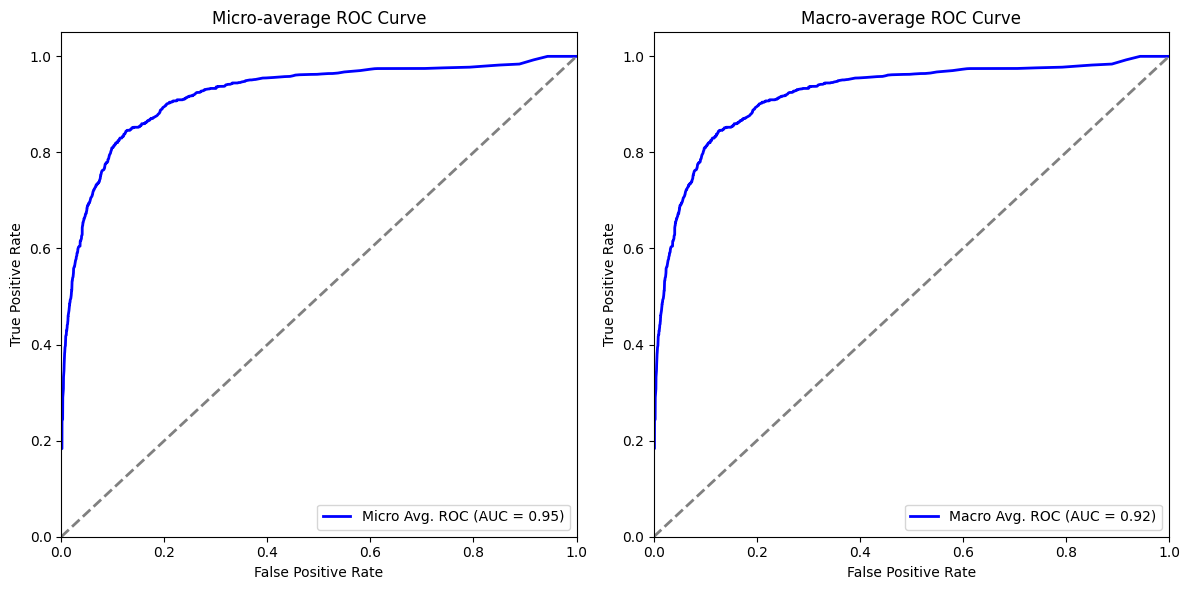

In [25]:
# Calculate micro-average ROC AUC score
roc_auc_micro = roc_auc_score(true_labels, predicted_probs, average='micro')

# Calculate macro-average ROC curve
n_classes = true_labels.shape[1]
all_fpr = []
all_tpr = []
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_labels[:, i], predicted_probs[:, i])
    all_fpr.append(fpr)
    all_tpr.append(tpr)

# Interpolate all ROC curves to create a common set of points for mean calculation
mean_fpr = np.unique(np.concatenate(all_fpr))
mean_tpr = np.zeros_like(mean_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(mean_fpr, all_fpr[i], all_tpr[i])

mean_tpr /= n_classes

# Calculate macro-average ROC AUC score
roc_auc_macro = auc(mean_fpr, mean_tpr)

# Create two subplots
plt.figure(figsize=(12, 6))

# Plot micro-average ROC curve
plt.subplot(1, 2, 1)
plt.plot(mean_fpr, mean_tpr, color='blue', linestyle='-', lw=2, label=f'Micro Avg. ROC (AUC = {roc_auc_micro:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve')
plt.legend(loc="lower right")

# Plot macro-average ROC curve
plt.subplot(1, 2, 2)
plt.plot(mean_fpr, mean_tpr, color='blue', linestyle='-', lw=2, label=f'Macro Avg. ROC (AUC = {roc_auc_macro:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC Curve')
plt.legend(loc="lower right")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [26]:
n_classes

17

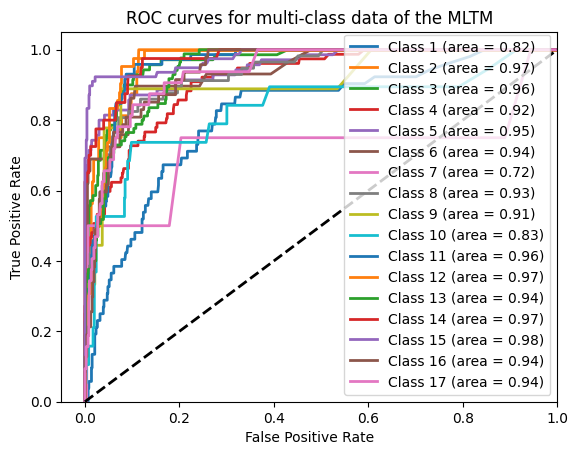

In [27]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multi-class data of the MLTM')
plt.legend(loc="lower right")
plt.savefig('roc1.png', format='png', dpi=1200)
plt.show()

# BERT

In [28]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(true_labels, bert_labels)

array([[[711,   8],
        [ 16,  36]],

       [[754,   1],
        [  2,  14]],

       [[699,   2],
        [  2,  68]],

       [[680,  14],
        [  7,  70]],

       [[701,   0],
        [  3,  67]],

       [[742,   0],
        [ 11,  18]],

       [[767,   0],
        [  2,   2]],

       [[707,   7],
        [  7,  50]],

       [[760,   2],
        [  5,   4]],

       [[745,   7],
        [  8,  11]],

       [[683,  16],
        [ 26,  46]],

       [[724,   5],
        [ 17,  25]],

       [[674,  12],
        [ 14,  71]],

       [[730,   1],
        [  1,  39]],

       [[690,   3],
        [  3,  75]],

       [[723,   1],
        [  9,  38]],

       [[736,   3],
        [ 14,  18]]])

In [29]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, bert_labels))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        52
           1       0.93      0.88      0.90        16
           2       0.97      0.97      0.97        70
           3       0.83      0.91      0.87        77
           4       1.00      0.96      0.98        70
           5       1.00      0.62      0.77        29
           6       1.00      0.50      0.67         4
           7       0.88      0.88      0.88        57
           8       0.67      0.44      0.53         9
           9       0.61      0.58      0.59        19
          10       0.74      0.64      0.69        72
          11       0.83      0.60      0.69        42
          12       0.86      0.84      0.85        85
          13       0.97      0.97      0.97        40
          14       0.96      0.96      0.96        78
          15       0.97      0.81      0.88        47
          16       0.86      0.56      0.68        32

   micro avg       0.89   

/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:

from sklearn.metrics import classification_report, accuracy_score, hamming_loss, precision_score

# Assuming you have true_labels and predicted_labels defined
# Calculate classification report using macro-averaging
report = classification_report(
    true_labels,
    bert_labels,
    output_dict=True
)
accuracy = accuracy_score(true_labels, bert_labels)
h_loss = hamming_loss(true_labels, bert_labels)
MR = np.all(true_labels == bert_labels, axis=1).mean()

# Extract micro-averaged precision, recall, and F1-score
micro_precision = report['micro avg']['precision']
micro_recall = report['micro avg']['recall']
micro_f1 = report['micro avg']['f1-score']

# Extract macro-averaged precision, recall, and F1-score
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1 = report['macro avg']['f1-score']

# Print the results
print(f"Micro Precision: {micro_precision:.2f}")
print(f"Micro Recall: {micro_recall:.2f}")
print(f"Micro F1-Score: {micro_f1:.2f}")
print(f"Macro Precision: {macro_precision:.2f}")
print(f"Macro Recall: {macro_recall:.2f}")
print(f"Macro F1-Score: {macro_f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Hamming Loss: {h_loss:.2f}")
print(f"Exact Match Ratio: {MR:.2f}")


def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

print('Hamming score: {0}'.format(hamming_score(true_labels, bert_labels))) # 0.375 (= (0.5+1+0+0)/4)




Micro Precision: 0.89
Micro Recall: 0.82
Micro F1-Score: 0.85
Macro Precision: 0.88
Macro Recall: 0.75
Macro F1-Score: 0.80
Accuracy: 0.82
Hamming Loss: 0.02
Exact Match Ratio: 0.82
Hamming score: 0.8216061392131432


/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
import numpy as np
from sklearn.metrics import roc_auc_score


# Calculate ROC AUC for each class and skip classes with only one class in y_true
roc_auc_scores = []
for i in range(true_labels.shape[1]):
    if len(np.unique(true_labels[:, i])) > 1:
        roc_auc = roc_auc_score(true_labels[:, i], bert_probs[:, i])
        roc_auc_scores.append(roc_auc)

# Calculate micro and macro average ROC AUC
micro_roc_auc = roc_auc_score(true_labels.ravel(), bert_probs.ravel(), average='micro')
macro_roc_auc = np.mean(roc_auc_scores)

print("ROC AUC Scores for Each Class:")
for i, score in enumerate(roc_auc_scores):
    print(f"Class {i}: {score:.4f}")

print(f"Micro ROC AUC: {micro_roc_auc:.4f}")
print(f"Macro ROC AUC: {macro_roc_auc:.4f}")
print(f"Accuracy: {accuracy:.2f}")

ROC AUC Scores for Each Class:
Class 0: 0.9651
Class 1: 0.9998
Class 2: 0.9998
Class 3: 0.9898
Class 4: 0.9830
Class 5: 0.9921
Class 6: 0.9974
Class 7: 0.9946
Class 8: 0.8237
Class 9: 0.9191
Class 10: 0.9673
Class 11: 0.9921
Class 12: 0.9836
Class 13: 1.0000
Class 14: 0.9992
Class 15: 0.9939
Class 16: 0.9384
Micro ROC AUC: 0.9845
Macro ROC AUC: 0.9729
Accuracy: 0.82


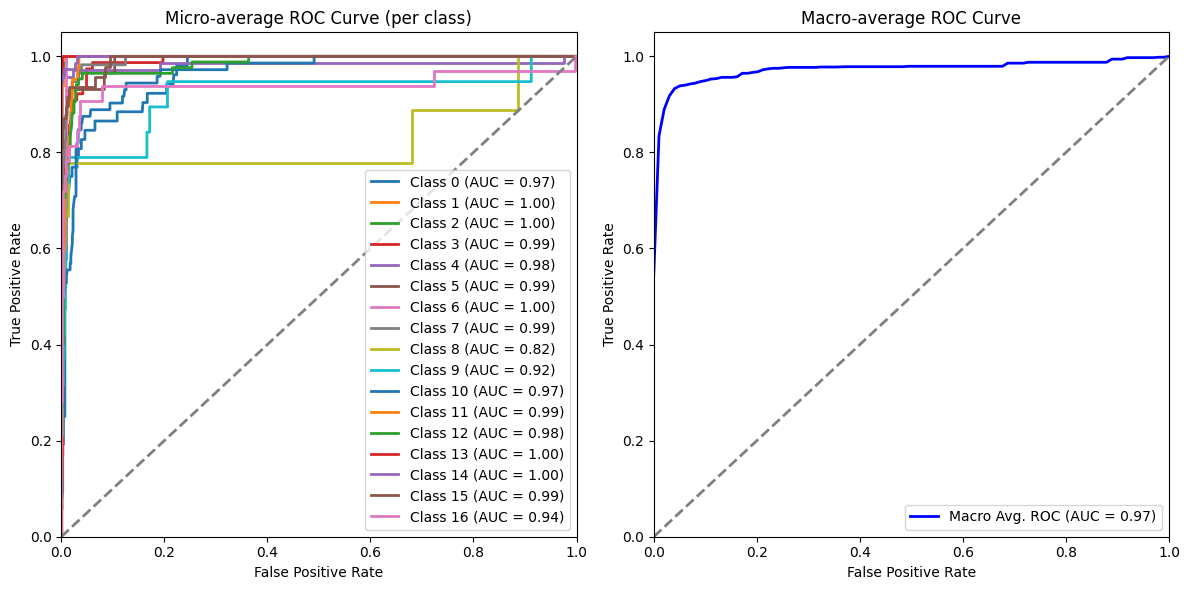

In [32]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate micro-average ROC AUC score
roc_auc_micro = roc_auc_score(true_labels, bert_probs, average='micro')

# Calculate macro-average ROC curve
n_classes = true_labels.shape[1]

plt.figure(figsize=(12, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for each class without interpolation
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Calculate macro-average ROC curve
mean_fpr = np.linspace(0, 1, 100)  # Common set of points
mean_tpr = np.zeros_like(mean_fpr)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    mean_tpr += np.interp(mean_fpr, fpr, tpr)

mean_tpr /= n_classes
roc_auc_macro = auc(mean_fpr, mean_tpr)

# Plot micro-average ROC curve
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve (per class)')
plt.legend(loc="lower right")

# Plot macro-average ROC curve
plt.subplot(1, 2, 2)
plt.plot(mean_fpr, mean_tpr, color='blue', linestyle='-', lw=2, label=f'Macro Avg. ROC (AUC = {roc_auc_macro:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC Curve')
plt.legend(loc="lower right")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


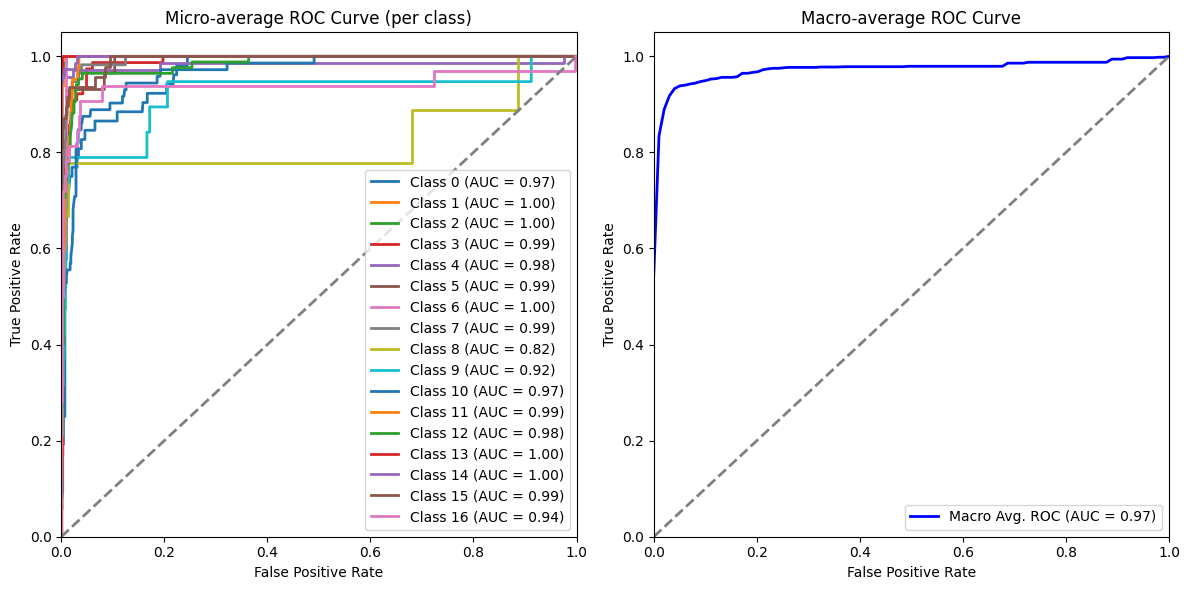

In [33]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate micro-average ROC AUC score
roc_auc_micro = roc_auc_score(true_labels, bert_probs, average='micro')

# Calculate macro-average ROC curve
n_classes = true_labels.shape[1]

plt.figure(figsize=(12, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for each class without interpolation
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Calculate macro-average ROC curve
mean_fpr = np.linspace(0, 1, 100)  # Common set of points
mean_tpr = np.zeros_like(mean_fpr)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    mean_tpr += np.interp(mean_fpr, fpr, tpr)

mean_tpr /= n_classes
roc_auc_macro = auc(mean_fpr, mean_tpr)

# Plot micro-average ROC curve
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve (per class)')
plt.legend(loc="lower right")

# Plot macro-average ROC curve
plt.subplot(1, 2, 2)
plt.plot(mean_fpr, mean_tpr, color='blue', linestyle='-', lw=2, label=f'Macro Avg. ROC (AUC = {roc_auc_macro:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC Curve')
plt.legend(loc="lower right")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



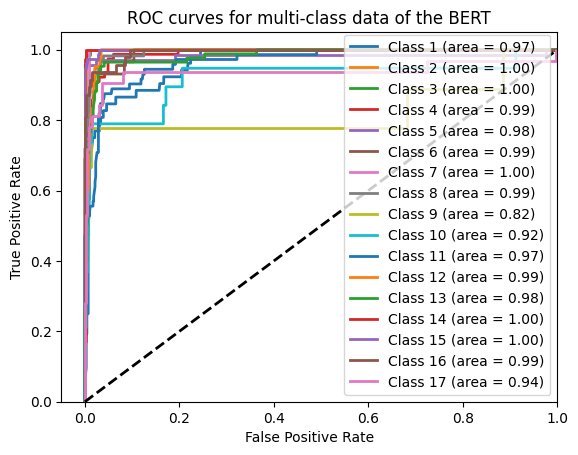

In [34]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multi-class data of the BERT')
plt.legend(loc="lower right")
plt.savefig('roc1.png', format='png', dpi=1200)
plt.show()

# COmpare F1

In [35]:
# Generate classification reports
report_predicted = classification_report(true_labels, predicted_labels, output_dict=True)
report_bert = classification_report(true_labels, bert_labels, output_dict=True)

/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/agus/DATA/DDALM/venv_sdgs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
report_bert

{'0': {'precision': 0.8181818181818182,
  'recall': 0.6923076923076923,
  'f1-score': 0.7500000000000001,
  'support': 52.0},
 '1': {'precision': 0.9333333333333333,
  'recall': 0.875,
  'f1-score': 0.9032258064516129,
  'support': 16.0},
 '2': {'precision': 0.9714285714285714,
  'recall': 0.9714285714285714,
  'f1-score': 0.9714285714285714,
  'support': 70.0},
 '3': {'precision': 0.8333333333333334,
  'recall': 0.9090909090909091,
  'f1-score': 0.8695652173913043,
  'support': 77.0},
 '4': {'precision': 1.0,
  'recall': 0.9571428571428572,
  'f1-score': 0.9781021897810218,
  'support': 70.0},
 '5': {'precision': 1.0,
  'recall': 0.6206896551724138,
  'f1-score': 0.7659574468085107,
  'support': 29.0},
 '6': {'precision': 1.0,
  'recall': 0.5,
  'f1-score': 0.6666666666666666,
  'support': 4.0},
 '7': {'precision': 0.8771929824561403,
  'recall': 0.8771929824561403,
  'f1-score': 0.8771929824561403,
  'support': 57.0},
 '8': {'precision': 0.6666666666666666,
  'recall': 0.444444444444

In [37]:
classes = [str(i) for i in range(len(report_predicted.keys()) - 3)]  # Extract class labels


In [38]:
report_bert.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', 'micro avg', 'macro avg', 'weighted avg', 'samples avg'])

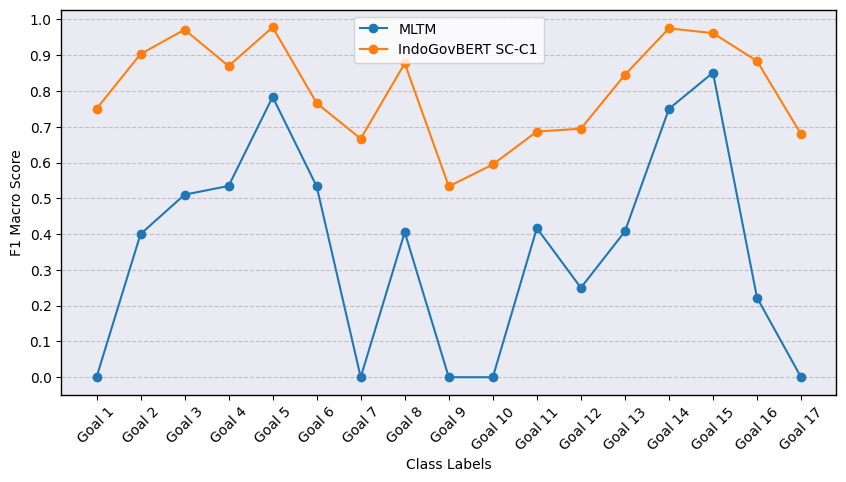

In [39]:
plt.figure(figsize=(10, 5))

# Extract F1_macro scores for each class
classes = [str(i) for i in range(len(report_predicted.keys()) - 4)]  # Extract class labels
labels_classes = [f'Goal {i}' for i in range(1, len(report_predicted.keys()) - 3)]  # Update class labels
f1_macro_predicted = [report_predicted[label]["f1-score"] for label in classes]
f1_macro_bert = [report_bert[label]["f1-score"] for label in classes]

# Create a line plot
x = np.arange(len(classes))
plt.plot(x, f1_macro_predicted, marker='o', label='MLTM', linestyle='-')
plt.plot(x, f1_macro_bert, marker='o', label='IndoGovBERT SC-C1', linestyle='-')

plt.xlabel('Class Labels')
plt.ylabel('F1 Macro Score')
#plt.title('Comparison of F1 Macro Scores by Class on NSA Activity Data')
plt.xticks(x, labels_classes, rotation=45)  # Rotate labels by 45 degrees
plt.legend()

# Customize the y-axis gridlines

y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Get the current axes
ax = plt.gca()
ax.set_facecolor('#eaeaf2')

# Set the linewidth for all spines to 1
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.0)


plt.show()

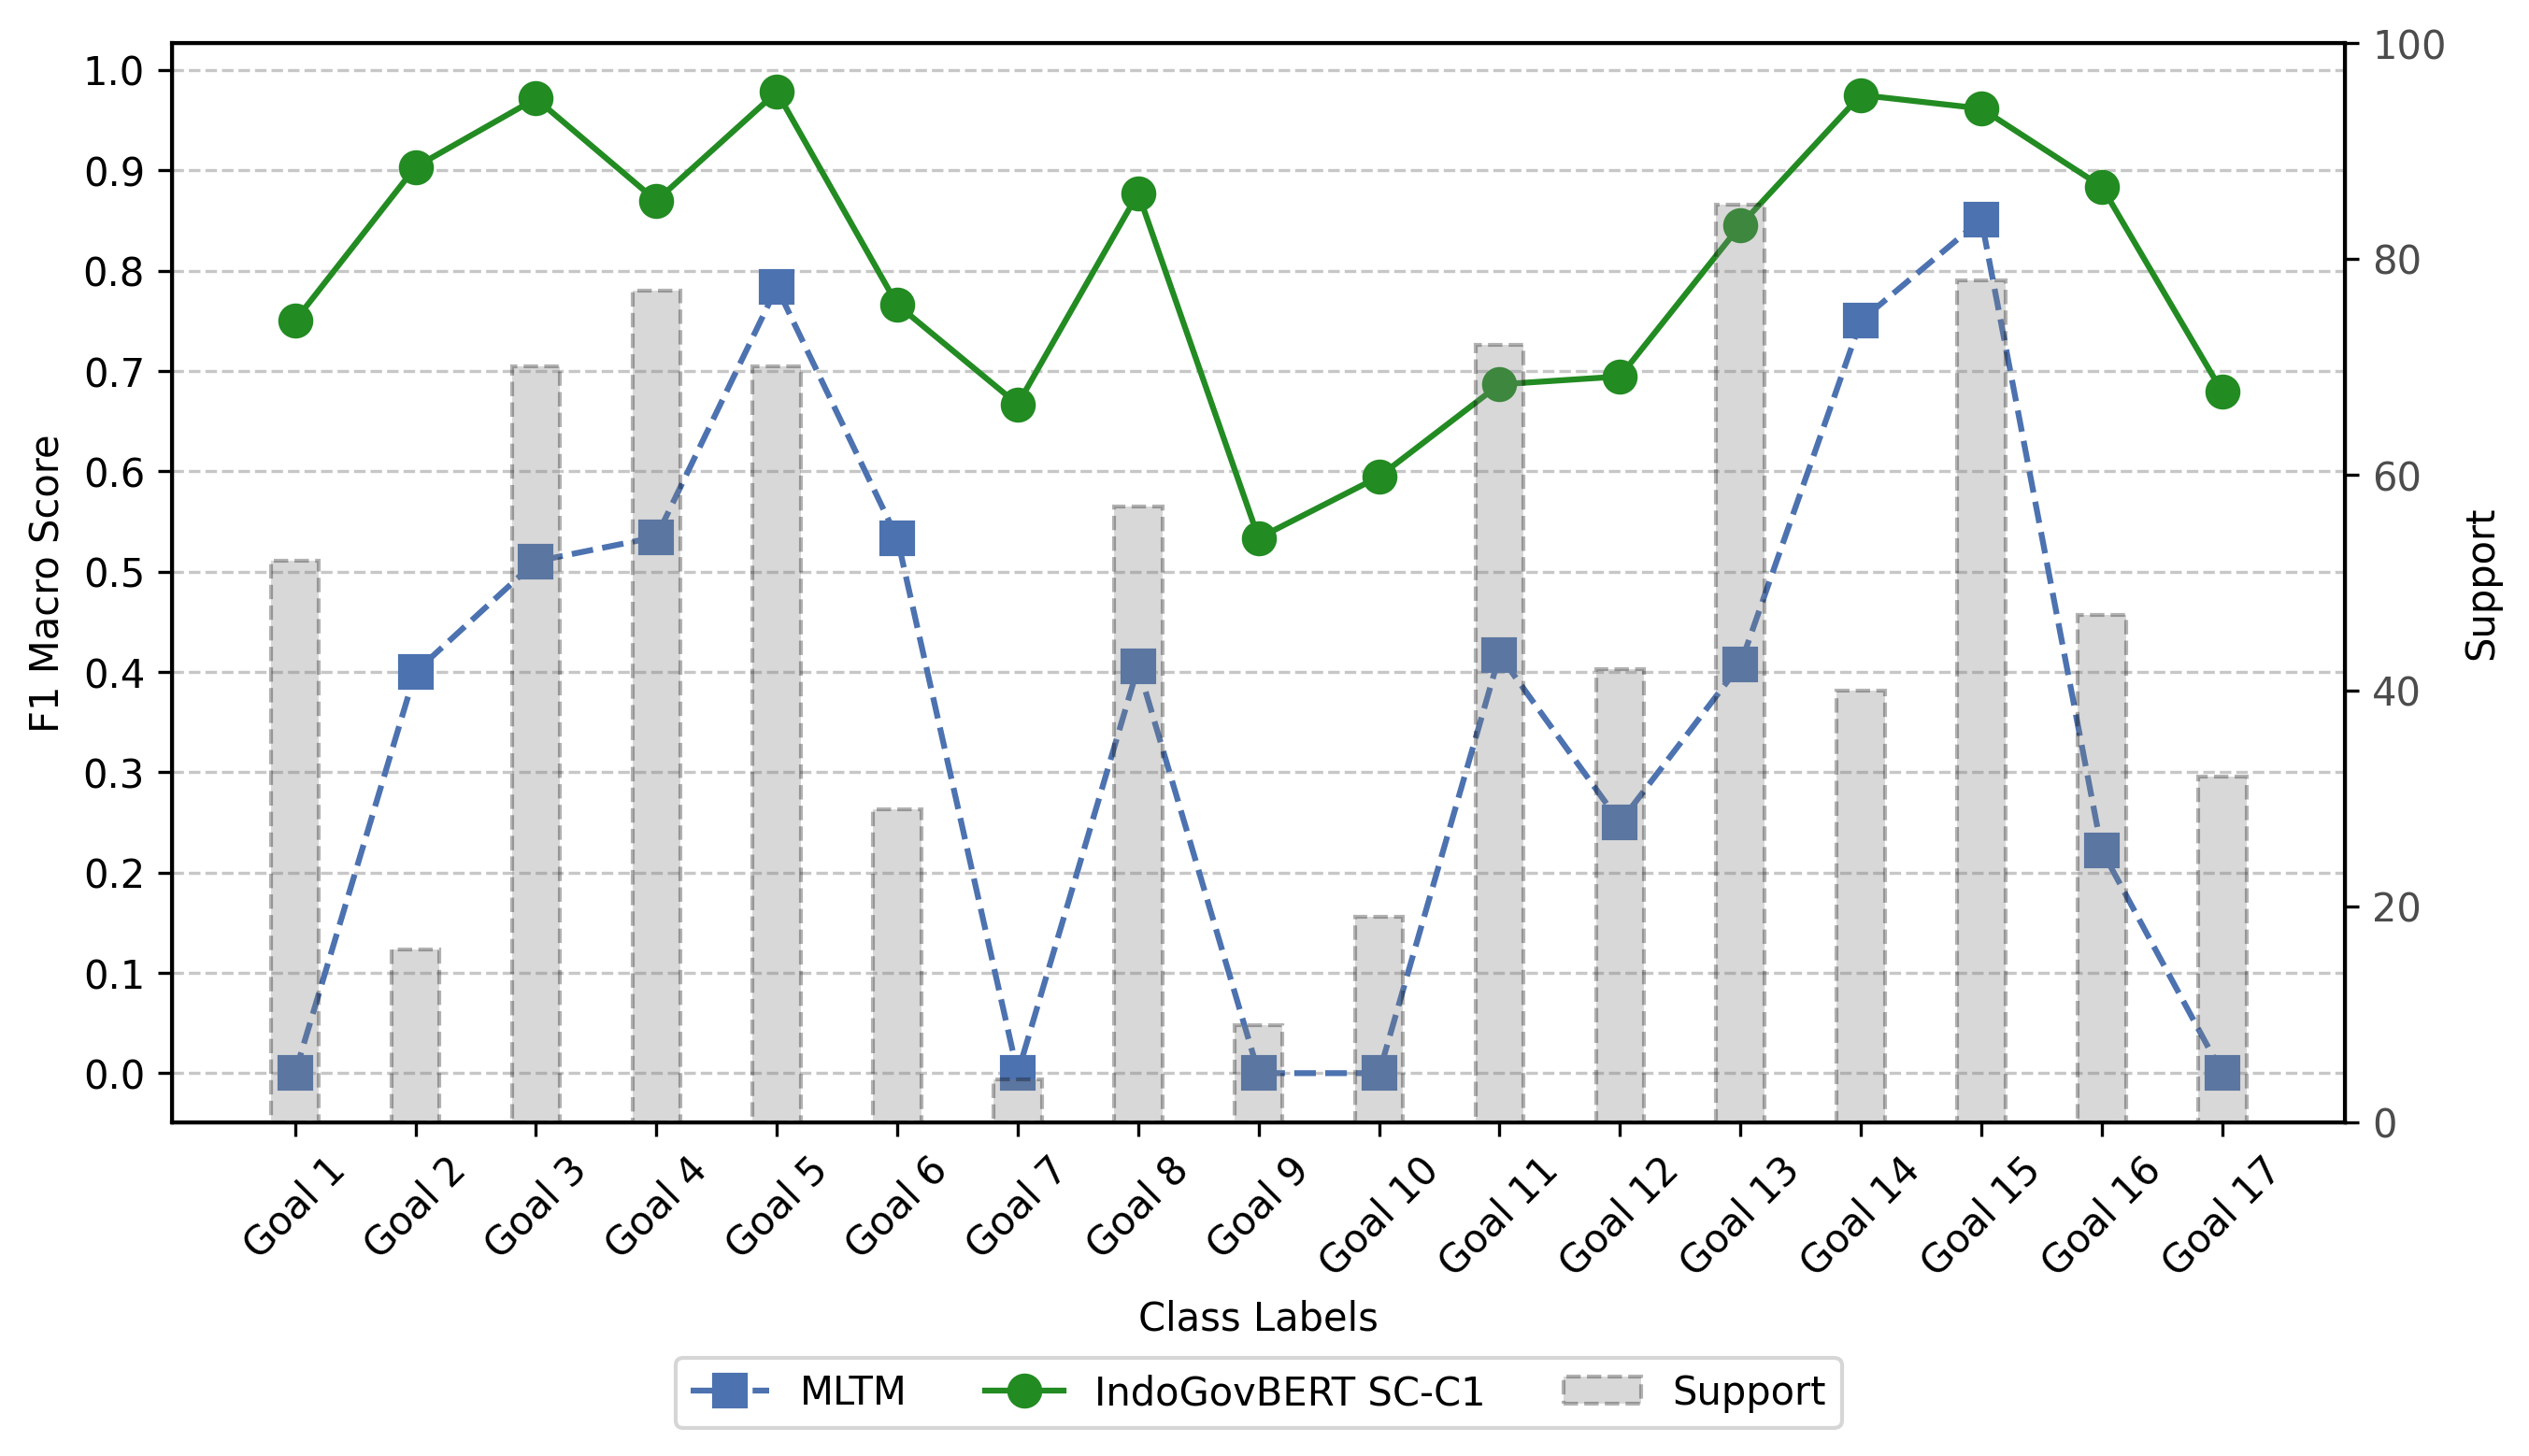

In [47]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5), dpi=300)

# Extract F1_macro scores and support values for each class
classes = [str(i) for i in range(len(report_predicted.keys()) - 4)]  # Extract class labels
labels_classes = [f'Goal {i}' for i in range(1, len(report_predicted.keys()) - 3)]  # Update class labels
f1_macro_predicted = [report_predicted[label]["f1-score"] for label in classes]
f1_macro_bert = [report_bert[label]["f1-score"] for label in classes]
support_data = [report_bert[label]["support"] for label in classes]

# Create a line plot for F1 Macro Scores on ax
x = np.arange(len(classes))

# Differentiate line styles and markers
plt.plot(x, f1_macro_predicted, marker='s', label='MLTM', linestyle='--', color='#4c72b0', markersize=8)
plt.plot(x, f1_macro_bert, marker='o', label='IndoGovBERT SC-C1', linestyle='-', color='forestgreen', markersize=8)

plt.xlabel('Class Labels')
plt.ylabel('F1 Macro Score')
plt.xticks(x, labels_classes, rotation=45)  # Rotate labels by 45 degrees
plt.legend()

# Customize the y-axis gridlines on ax
y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Get the current axes (ax)
ax = plt.gca()
ax.set_facecolor('white')

# Set the linewidth for all spines to 1 on ax
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.0)

# Create a secondary y-axis (ax2) for support data
ax2 = ax.twinx()
ax2.bar(x, support_data, alpha=0.3, linestyle='--', linewidth=1, color='gray', edgecolor='black', width=0.4, label='Support')

# Customize the y-axis gridlines on ax2
y_ticks_ax2 = np.arange(0, 110, 20)  # Adjust based on your support data range
ax2.set_yticks(y_ticks_ax2)

# Set the y-axis label for ax2
ax2.set_ylabel('Support')

# Set alpha for y-axis ticks on ax2
for label in ax2.get_yticklabels():
    label.set_alpha(0.7)

# Combine legend for both line and bar plots
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, ncol=3, frameon=True)

# Turn off the grid
plt.grid(False)

plt.show()


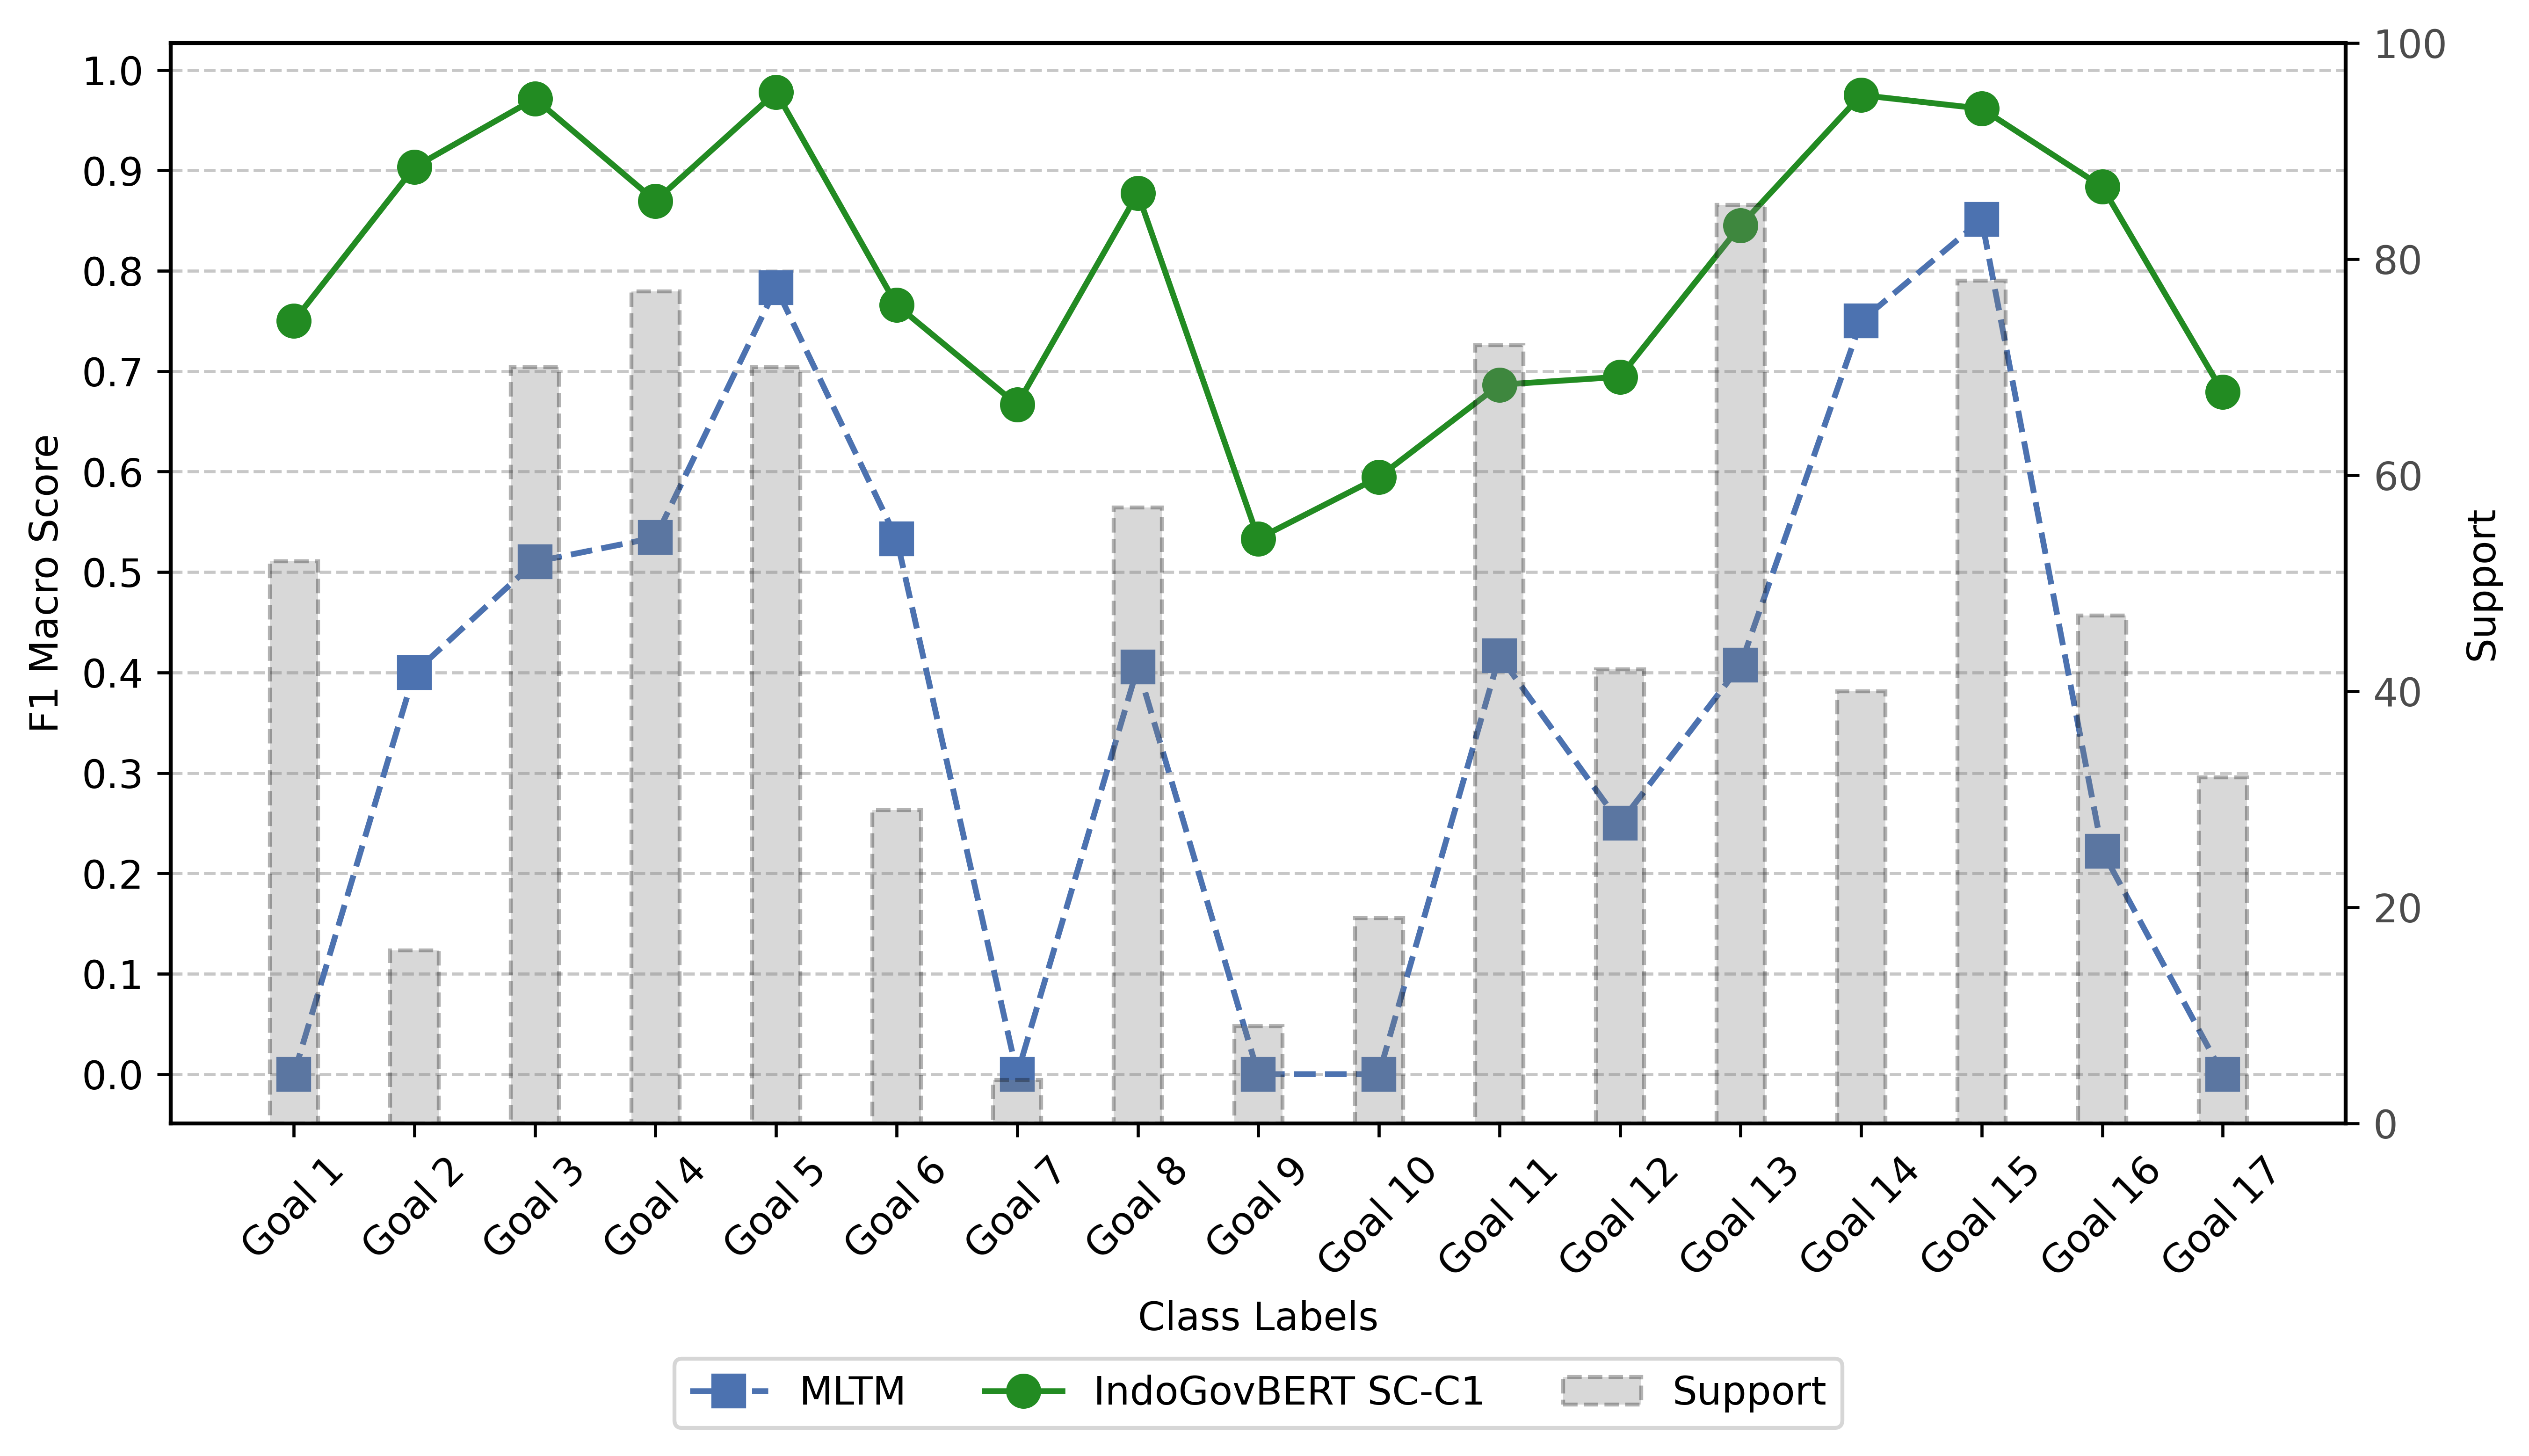

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5), dpi=600)

# Extract F1_macro scores and support values for each class
classes = [str(i) for i in range(len(report_predicted.keys()) - 4)]  # Extract class labels
labels_classes = [f'Goal {i}' for i in range(1, len(report_predicted.keys()) - 3)]  # Update class labels
f1_macro_predicted = [report_predicted[label]["f1-score"] for label in classes]
f1_macro_bert = [report_bert[label]["f1-score"] for label in classes]
support_data = [report_bert[label]["support"] for label in classes]

# Create a line plot for F1 Macro Scores on ax
x = np.arange(len(classes))

# Differentiate line styles and markers
plt.plot(x, f1_macro_predicted, marker='s', label='MLTM', linestyle='--', color='#4c72b0', markersize=8)
plt.plot(x, f1_macro_bert, marker='o', label='IndoGovBERT SC-C1', linestyle='-', color='forestgreen', markersize=8)

plt.xlabel('Class Labels')
plt.ylabel('F1 Macro Score')
plt.xticks(x, labels_classes, rotation=45)  # Rotate labels by 45 degrees
plt.legend()

# Customize the y-axis gridlines on ax
y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Get the current axes (ax)
ax = plt.gca()
ax.set_facecolor('white')

# Set the linewidth for all spines to 1 on ax
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.0)

# Create a secondary y-axis (ax2) for support data
ax2 = ax.twinx()
ax2.bar(x, support_data, alpha=0.3, linestyle='--', linewidth=1, color='gray', edgecolor='black', width=0.4, label='Support')

# Customize the y-axis gridlines on ax2
y_ticks_ax2 = np.arange(0, 110, 20)  # Adjust based on your support data range
ax2.set_yticks(y_ticks_ax2)

# Set the y-axis label for ax2
ax2.set_ylabel('Support')

# Set alpha for y-axis ticks on ax2
for label in ax2.get_yticklabels():
    label.set_alpha(0.7)

# Combine legend for both line and bar plots
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, ncol=3, frameon=True)

# Turn off the grid
plt.grid(False)

plt.show()


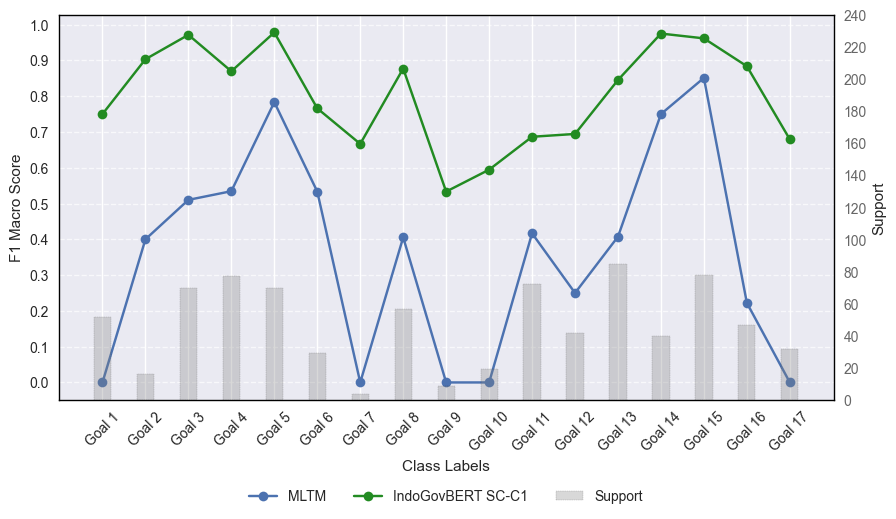

In [312]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))

# Extract F1_macro scores and support values for each class
classes = [str(i) for i in range(len(report_predicted.keys()) - 4)]  # Extract class labels
labels_classes = [f'Goal {i}' for i in range(1, len(report_predicted.keys()) - 3)]  # Update class labels
f1_macro_predicted = [report_predicted[label]["f1-score"] for label in classes]
f1_macro_bert = [report_bert[label]["f1-score"] for label in classes]
support_data = [report_bert[label]["support"] for label in classes]

# Create a line plot for F1 Macro Scores on ax
x = np.arange(len(classes))
plt.plot(x, f1_macro_predicted, marker='o', label='MLTM', linestyle='-', color='#4c72b0')
plt.plot(x, f1_macro_bert, marker='o', label='IndoGovBERT SC-C1', linestyle='-', color='forestgreen')

plt.xlabel('Class Labels')
plt.ylabel('F1 Macro Score')
plt.xticks(x, labels_classes, rotation=45)  # Rotate labels by 45 degrees
plt.legend()

# Customize the y-axis gridlines on ax
y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Get the current axes (ax)
ax = plt.gca()
ax.set_facecolor('#eaeaf2')

# Set the linewidth for all spines to 1 on ax
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.0)

# Create a secondary y-axis (ax2) for support data
ax2 = ax.twinx()
ax2.bar(x, support_data, alpha=0.3, linestyle='--', color='gray', edgecolor='black', width=0.4, label='Support')

# Customize the y-axis gridlines on ax2
y_ticks_ax2 = np.arange(0, 250, 20)  # Adjust based on your support data range
ax2.set_yticks(y_ticks_ax2)

# Set the y-axis label for ax2
ax2.set_ylabel('Support')

# Set alpha for y-axis ticks on ax2
for label in ax2.get_yticklabels():
    label.set_alpha(0.7)

# Combine legend for both line and bar plots
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#ax.legend(lines + lines2, labels + labels2, loc='lower left')
ax.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, ncol=3)

plt.grid(False)

plt.show()

In [165]:
f1_macro_predicted

[0.0,
 0.4,
 0.5102040816326532,
 0.5344827586206897,
 0.7833333333333332,
 0.5333333333333333,
 0.0,
 0.40540540540540543,
 0.0,
 0.0,
 0.4166666666666667,
 0.25,
 0.40740740740740744,
 0.7499999999999999,
 0.8510638297872339,
 0.2222222222222222,
 0.0]

In [166]:
f1_macro_bert

[0.7500000000000001,
 0.9032258064516129,
 0.9714285714285714,
 0.8695652173913043,
 0.9781021897810218,
 0.7659574468085107,
 0.6666666666666666,
 0.8771929824561403,
 0.5333333333333333,
 0.5945945945945946,
 0.6865671641791045,
 0.6944444444444444,
 0.8452380952380952,
 0.975,
 0.9615384615384616,
 0.8837209302325582,
 0.6792452830188678]

# COmbine

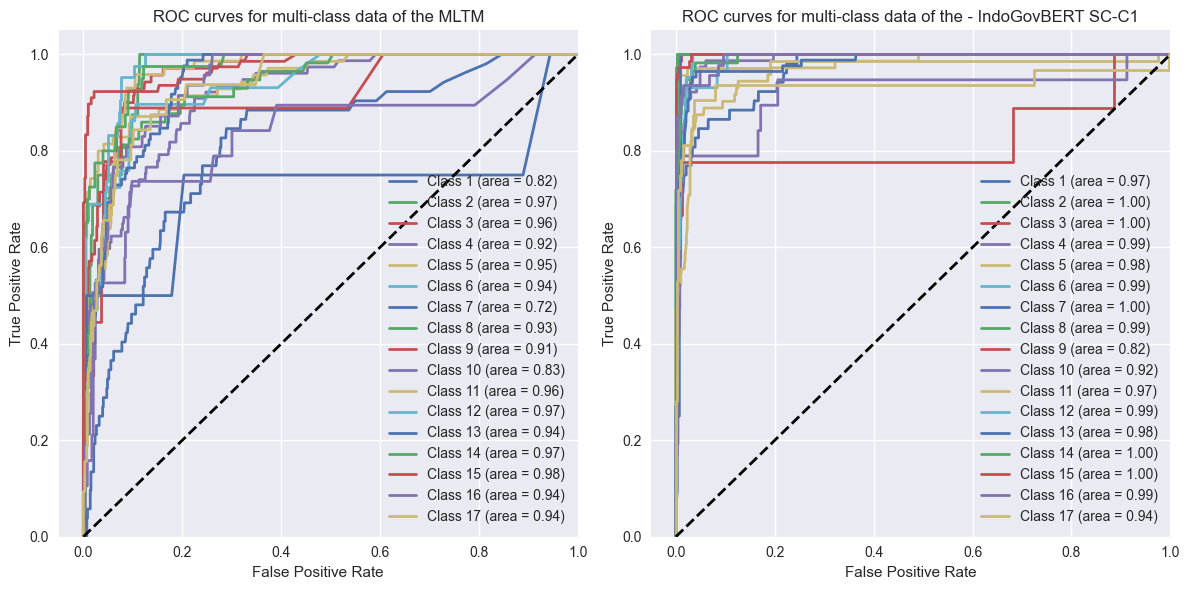

In [167]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have defined the variables for MLTM and BERT ROC data

# Create a new figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Plot ROC curves for MLTM
plt.subplot(1, 2, 1)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multi-class data of the MLTM')
plt.legend(loc="lower right")

# Plot ROC curves for BERT
plt.subplot(1, 2, 2)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multi-class data of the - IndoGovBERT SC-C1')
plt.legend(loc="lower right")

# Adjust spacing between subplots
plt.tight_layout()
plt.grid(True)

# Show the combined plots
plt.show()


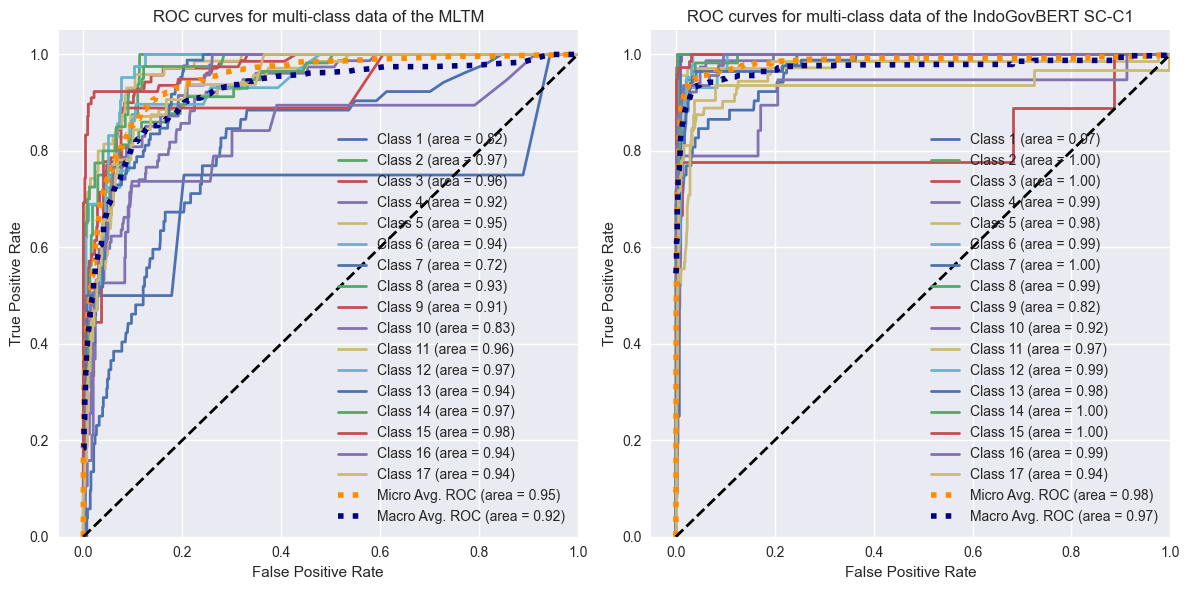

In [168]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have defined the variables for MLTM and BERT ROC data

# Create a new figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Plot ROC curves for MLTM
plt.subplot(1, 2, 1)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

# Calculate micro-average ROC and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), predicted_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', linestyle=':',
         linewidth=4, label='Micro Avg. ROC (area = {0:0.2f})'.format(roc_auc["micro"]))

# Calculate macro-average ROC and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)
plt.plot(all_fpr, mean_tpr, color='navy', linestyle=':',
         linewidth=4, label='Macro Avg. ROC (area = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multi-class data of the MLTM')
plt.legend(loc="lower right")

# Plot ROC curves for BERT
plt.subplot(1, 2, 2)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

# Calculate micro-average ROC and AUC for BERT
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), bert_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', linestyle=':',
         linewidth=4, label='Micro Avg. ROC (area = {0:0.2f})'.format(roc_auc["micro"]))

# Calculate macro-average ROC and AUC for BERT
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)
plt.plot(all_fpr, mean_tpr, color='navy', linestyle=':',
         linewidth=4, label='Macro Avg. ROC (area = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# Finish the plot settings for ROC curves for BERT
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multi-class data of the IndoGovBERT SC-C1')
plt.legend(loc="lower right")

# Adjust spacing between subplots
plt.tight_layout()


# Show the combined plots
plt.show()



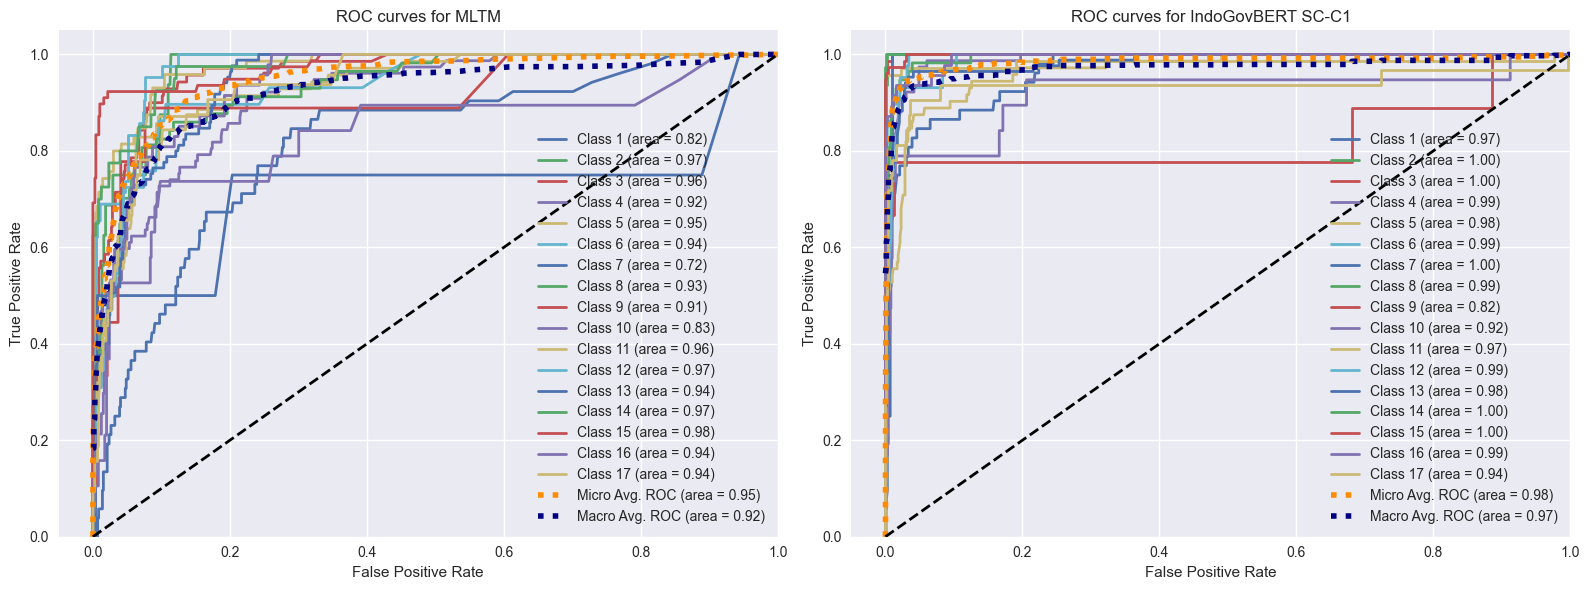

In [169]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have defined the variables for MLTM and BERT ROC data

# Create a new figure with two subplots side by side
plt.figure(figsize=(16, 6))

# Plot ROC curves for MLTM
plt.subplot(1, 2, 1)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])

colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i]))

# Calculate micro-average ROC and AUC for MLTM
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), predicted_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', linestyle=':',
         linewidth=4, label='Micro Avg. ROC (area = {0:0.2f})'.format(roc_auc["micro"]))

# Calculate macro-average ROC and AUC for MLTM
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)
plt.plot(all_fpr, mean_tpr, color='navy', linestyle=':',
         linewidth=4, label='Macro Avg. ROC (area = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for MLTM')
plt.legend(loc="lower right")

# Plot ROC curves for BERT
plt.subplot(1, 2, 2)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
scores1 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    scores1.append(roc_auc[i])

colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i]))

# Calculate micro-average ROC and AUC for BERT
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), bert_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', linestyle=':',
         linewidth=4, label='Micro Avg. ROC (area = {0:0.2f})'.format(roc_auc["micro"]))

# Calculate macro-average ROC and AUC for BERT
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)
plt.plot(all_fpr, mean_tpr, color='navy', linestyle=':',
         linewidth=4, label='Macro Avg. ROC (area = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# Finish the plot settings for ROC curves for BERT
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for IndoGovBERT SC-C1')
plt.legend(loc="lower right")

# Adjust
# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plots
plt.show()


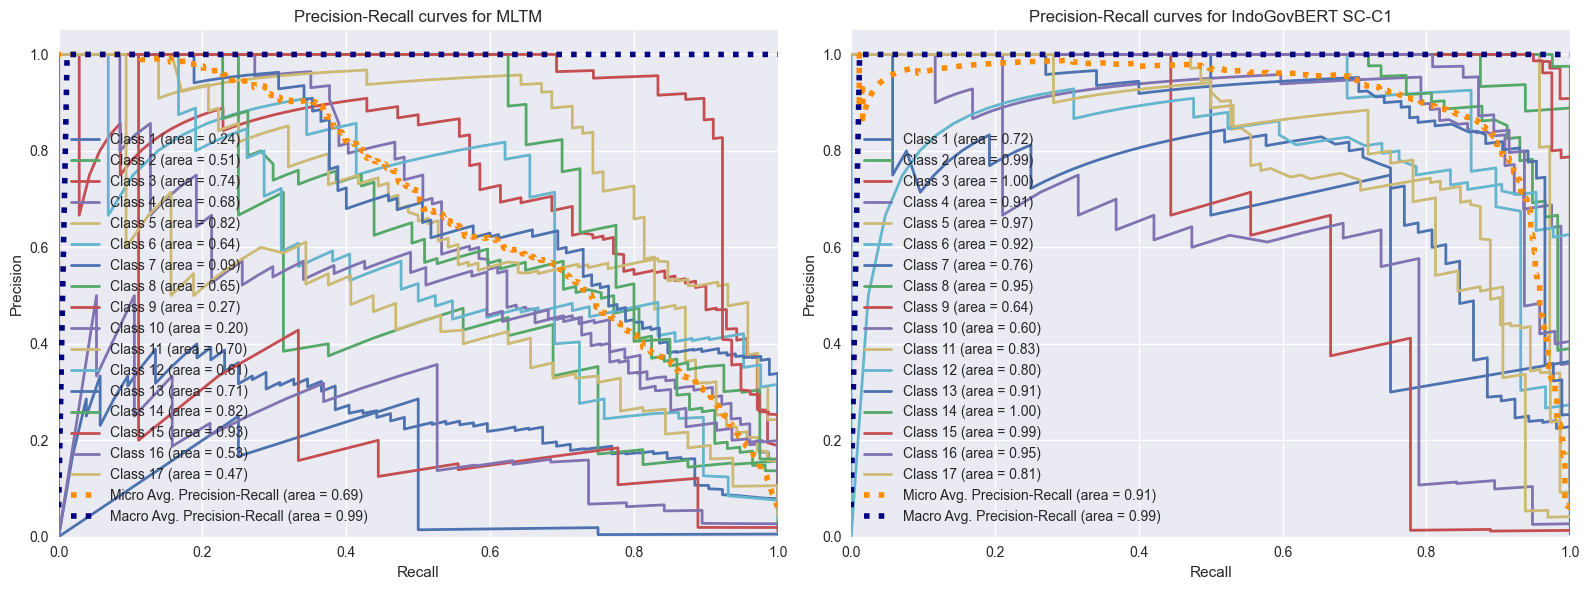

In [170]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from itertools import cycle

# Assuming you have defined the variables for MLTM and BERT Precision-Recall data

# Create a new figure with two subplots side by side
plt.figure(figsize=(16, 6))

# Plot Precision-Recall curves for MLTM
plt.subplot(1, 2, 1)
precision = dict()
recall = dict()
pr_auc = dict()
lw = 2
scores1 = []

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(true_labels[:, i], predicted_probs[:, i])
    pr_auc[i] = auc(recall[i], precision[i])
    scores1.append(pr_auc[i])

colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i + 1, pr_auc[i]))

# Calculate micro-average Precision-Recall and AUC for MLTM
precision["micro"], recall["micro"], _ = precision_recall_curve(true_labels.ravel(), predicted_probs.ravel())
pr_auc["micro"] = auc(recall["micro"], precision["micro"])
plt.plot(recall["micro"], precision["micro"], color='darkorange', linestyle=':',
         linewidth=4, label='Micro Avg. Precision-Recall (area = {0:0.2f})'.format(pr_auc["micro"]))

# Calculate macro-average Precision-Recall and AUC for MLTM
all_recall = np.unique(np.concatenate([recall[i] for i in range(n_classes)]))
mean_precision = np.zeros_like(all_recall)
for i in range(n_classes):
    mean_precision += np.interp(all_recall, recall[i], precision[i])

mean_precision /= n_classes
pr_auc["macro"] = auc(all_recall, mean_precision)
plt.plot(all_recall, mean_precision, color='navy', linestyle=':',
         linewidth=4, label='Macro Avg. Precision-Recall (area = {0:0.2f})'.format(pr_auc["macro"]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves for MLTM')
plt.legend(loc="lower left")

# Plot Precision-Recall curves for BERT
plt.subplot(1, 2, 2)
precision = dict()
recall = dict()
pr_auc = dict()
lw = 2
scores1 = []

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(true_labels[:, i], bert_probs[:, i])
    pr_auc[i] = auc(recall[i], precision[i])
    scores1.append(pr_auc[i])

colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], lw=2,
             label='Class {0} (area = {1:0.2f})'
             ''.format(i + 1, pr_auc[i]))

# Calculate micro-average Precision-Recall and AUC for BERT
precision["micro"], recall["micro"], _ = precision_recall_curve(true_labels.ravel(), bert_probs.ravel())
pr_auc["micro"] = auc(recall["micro"], precision["micro"])
plt.plot(recall["micro"], precision["micro"], color='darkorange', linestyle=':',
         linewidth=4, label='Micro Avg. Precision-Recall (area = {0:0.2f})'.format(pr_auc["micro"]))

# Calculate macro-average Precision-Recall and AUC for BERT
all_recall = np.unique(np.concatenate([recall[i] for i in range(n_classes)]))
mean_precision = np.zeros_like(all_recall)
for i in range(n_classes):
    mean_precision += np.interp(all_recall, recall[i], precision[i])

mean_precision /= n_classes
pr_auc["macro"] = auc(all_recall, mean_precision)
plt.plot(all_recall, mean_precision, color='navy', linestyle=':',
         linewidth=4, label='Macro Avg. Precision-Recall (area = {0:0.2f})'.format(pr_auc["macro"]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves for IndoGovBERT SC-C1')
plt.legend(loc="lower left")

# Adjust
# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plots
plt.show()

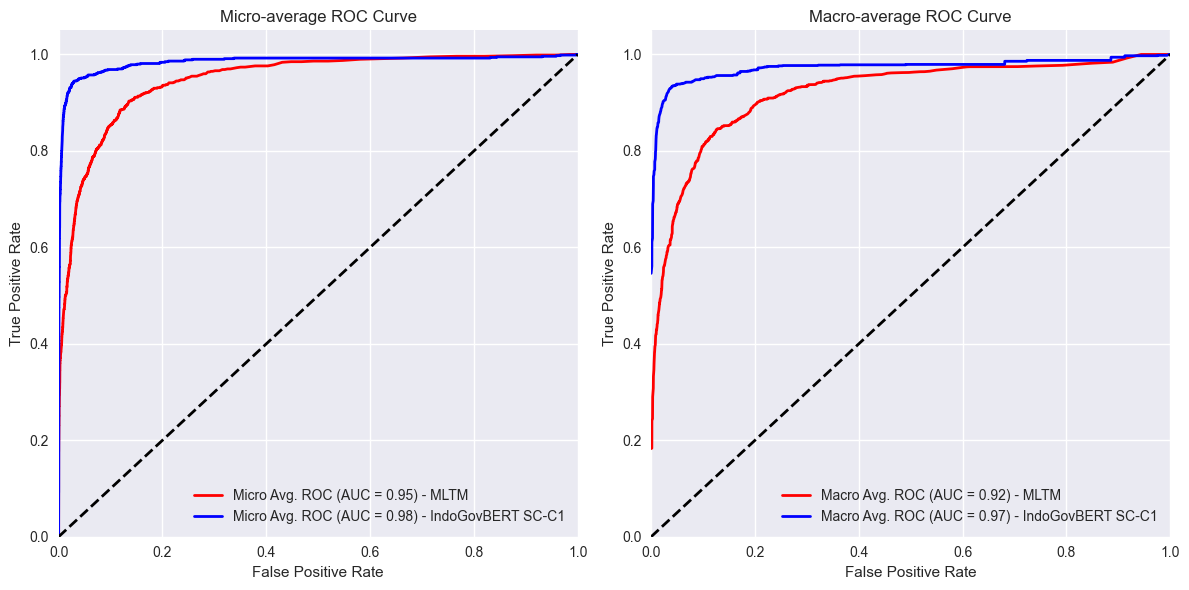

In [171]:
# Create a figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Compute micro-average ROC curve and ROC area for MLTM
fpr_mltm_micro, tpr_mltm_micro, _ = roc_curve(true_labels.ravel(), predicted_probs.ravel())
roc_auc_mltm_micro = auc(fpr_mltm_micro, tpr_mltm_micro)

# First aggregate all false positive rates for MLTM
all_fpr_mltm = np.unique(fpr_mltm_micro)

# Then interpolate the micro-average ROC curve for MLTM
mean_tpr_mltm_micro = np.interp(all_fpr_mltm, fpr_mltm_micro, tpr_mltm_micro)

# Plot micro-average ROC curve for MLTM
plt.subplot(1, 2, 1)
plt.plot(
    fpr_mltm_micro,
    tpr_mltm_micro,
    label="Micro Avg. ROC (AUC = {0:.2f}) - MLTM".format(roc_auc_mltm_micro),
    color="red",
    linestyle="-",
    linewidth=2,
)

# Compute micro-average ROC curve and ROC area for BERT
fpr_bert_micro, tpr_bert_micro, _ = roc_curve(true_labels.ravel(), bert_probs.ravel())
roc_auc_bert_micro = auc(fpr_bert_micro, tpr_bert_micro)

# Then interpolate the micro-average ROC curve for BERT
mean_tpr_bert_micro = np.interp(all_fpr_mltm, fpr_bert_micro, tpr_bert_micro)

# Plot micro-average ROC curve for BERT
plt.plot(
    fpr_bert_micro,
    tpr_bert_micro,
    label="Micro Avg. ROC (AUC = {0:.2f}) - IndoGovBERT SC-C1".format(roc_auc_bert_micro),
    color="blue",
    linestyle="-",
    linewidth=2,
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve')
plt.legend(loc="lower right")

# Compute macro-average ROC curve for MLTM
n_classes_mltm = true_labels.shape[1]
all_fpr_mltm_macro = []
all_tpr_mltm_macro = []
for i in range(n_classes_mltm):
    fpr, tpr, _ = roc_curve(true_labels[:, i], predicted_probs[:, i])
    all_fpr_mltm_macro.append(fpr)
    all_tpr_mltm_macro.append(tpr)

# Interpolate all ROC curves to create a common set of points for macro-average calculation for MLTM
mean_fpr_mltm_macro = np.unique(np.concatenate(all_fpr_mltm_macro))
mean_tpr_mltm_macro = np.zeros_like(mean_fpr_mltm_macro)
for i in range(n_classes_mltm):
    mean_tpr_mltm_macro += np.interp(mean_fpr_mltm_macro, all_fpr_mltm_macro[i], all_tpr_mltm_macro[i])

mean_tpr_mltm_macro /= n_classes_mltm

# Calculate macro-average ROC AUC score for MLTM
roc_auc_mltm_macro = auc(mean_fpr_mltm_macro, mean_tpr_mltm_macro)

# Compute macro-average ROC curve for BERT
n_classes_bert = true_labels.shape[1]
all_fpr_bert_macro = []
all_tpr_bert_macro = []
for i in range(n_classes_bert):
    fpr, tpr, _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    all_fpr_bert_macro.append(fpr)
    all_tpr_bert_macro.append(tpr)

# Interpolate all ROC curves to create a common set of points for macro-average calculation for BERT
mean_fpr_bert_macro = np.unique(np.concatenate(all_fpr_bert_macro))
mean_tpr_bert_macro = np.zeros_like(mean_fpr_bert_macro)
for i in range(n_classes_bert):
    mean_tpr_bert_macro += np.interp(mean_fpr_bert_macro, all_fpr_bert_macro[i], all_tpr_bert_macro[i])

mean_tpr_bert_macro /= n_classes_bert

# Calculate macro-average ROC AUC score for BERT
roc_auc_bert_macro = auc(mean_fpr_bert_macro, mean_tpr_bert_macro)

# Plot macro-average ROC curve for MLTM
plt.subplot(1, 2, 2)
# Plot macro-average ROC curve for MLTM
plt.plot(
    mean_fpr_mltm_macro,
    mean_tpr_mltm_macro,
    label="Macro Avg. ROC (AUC = {0:.2f}) - MLTM".format(roc_auc_mltm_macro),
    color="red",
    linestyle="-",
    linewidth=2,
)

# Plot macro-average ROC curve for BERT
plt.plot(
    mean_fpr_bert_macro,
    mean_tpr_bert_macro,
    label="Macro Avg. ROC (AUC = {0:.2f}) - IndoGovBERT SC-C1".format(roc_auc_bert_macro),
    color="blue",
    linestyle="-",
    linewidth=2,
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC Curve')
plt.legend(loc="lower right")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [201]:
predicted_probs.shape

(771, 17)

In [200]:
true_labels.shape

(771, 17)

In [219]:
recall_mltm_micro

array([1.        , 1.        , 1.        , ..., 0.00250313, 0.00125156,
       0.        ])

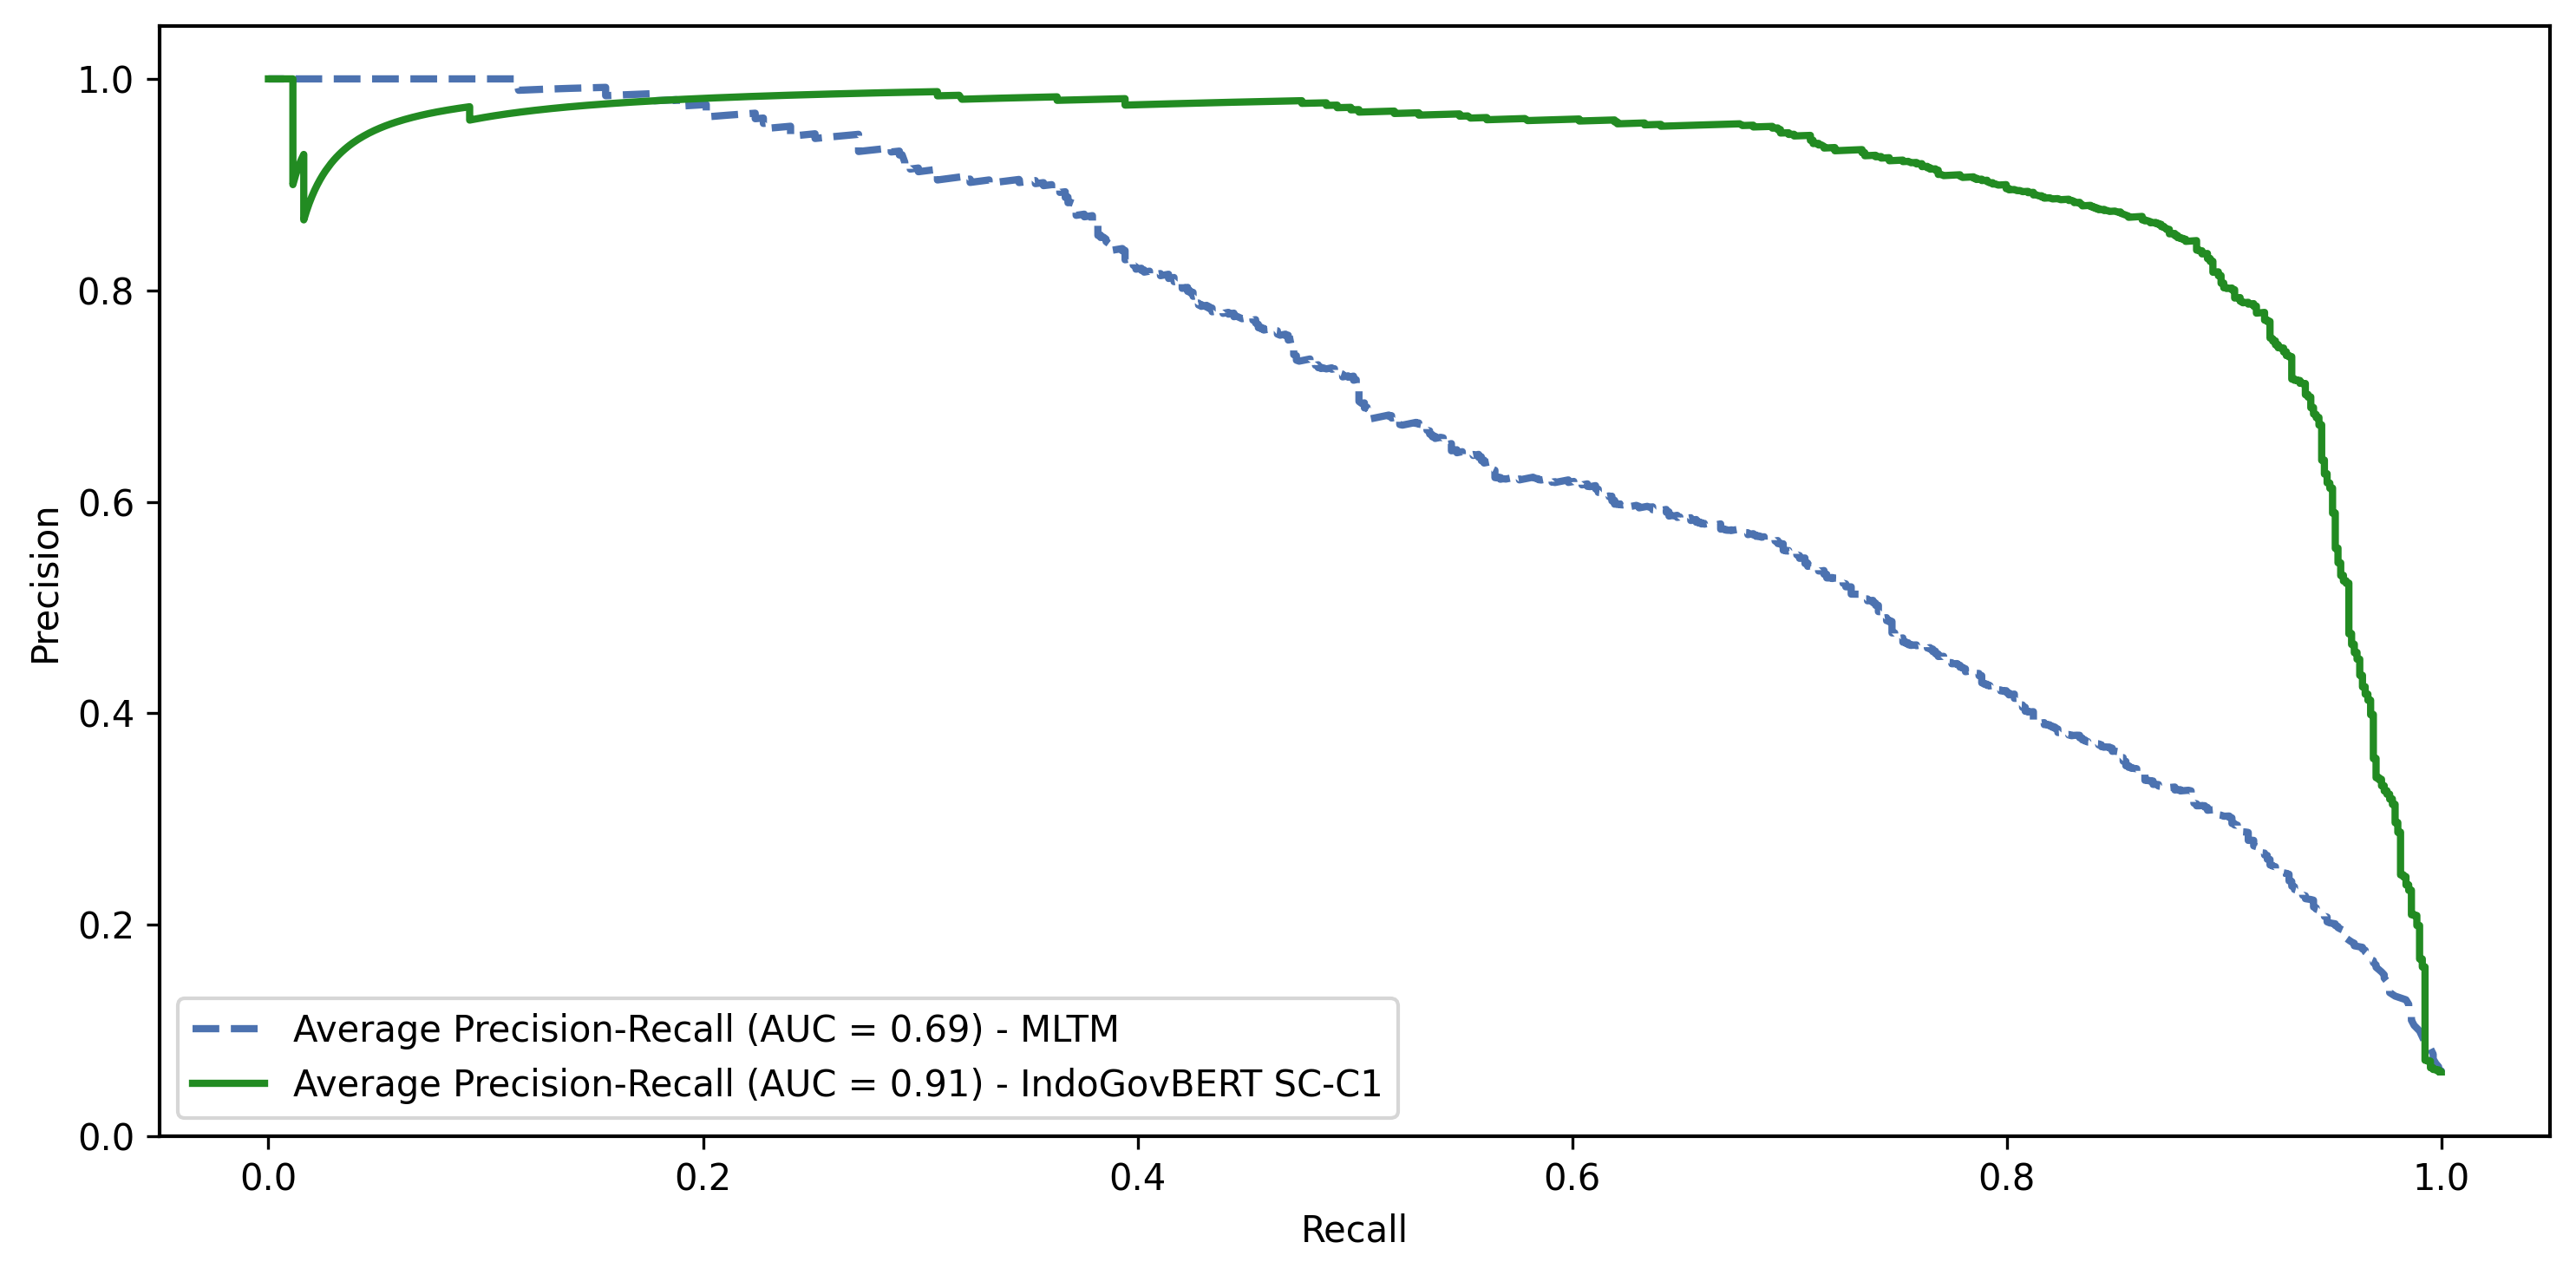

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have defined the variables for MLTM and BERT Precision-Recall data

# Calculate micro-average Precision-Recall and AUC for MLTM
precision_mltm_micro, recall_mltm_micro, _ = precision_recall_curve(true_labels.ravel(), predicted_probs.ravel())
pr_auc_mltm_micro = average_precision_score(true_labels, predicted_probs, average='micro')

precision_bert_micro, recall_bert_micro, _ = precision_recall_curve(true_labels.ravel(), bert_probs.ravel())
pr_auc_bert_micro = average_precision_score(true_labels, bert_probs, average='micro')


# Plot micro-average Precision-Recall curve for MLTM
plt.figure(figsize=(10, 5), dpi=300)
ax = plt.gca()
ax.set_facecolor('white')

plt.plot(
    recall_mltm_micro,
    precision_mltm_micro,
    label="Average Precision-Recall (AUC = {0:.2f}) - MLTM".format(pr_auc_mltm_micro),
    color="#4c72b0",
    linestyle="--",
    linewidth=2,
)

plt.plot(
    recall_bert_micro,
    precision_bert_micro,
    label="Average Precision-Recall (AUC = {0:.2f}) - IndoGovBERT SC-C1".format(pr_auc_bert_micro),
    color="forestgreen",
    linestyle="-",
    linewidth=2,
)

# Set the linewidth for all spines to 1 on ax
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.0)

plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")

# Adjust spacing between subplots
plt.tight_layout()

plt.grid(True, color='white')

# Show the plot
plt.show()


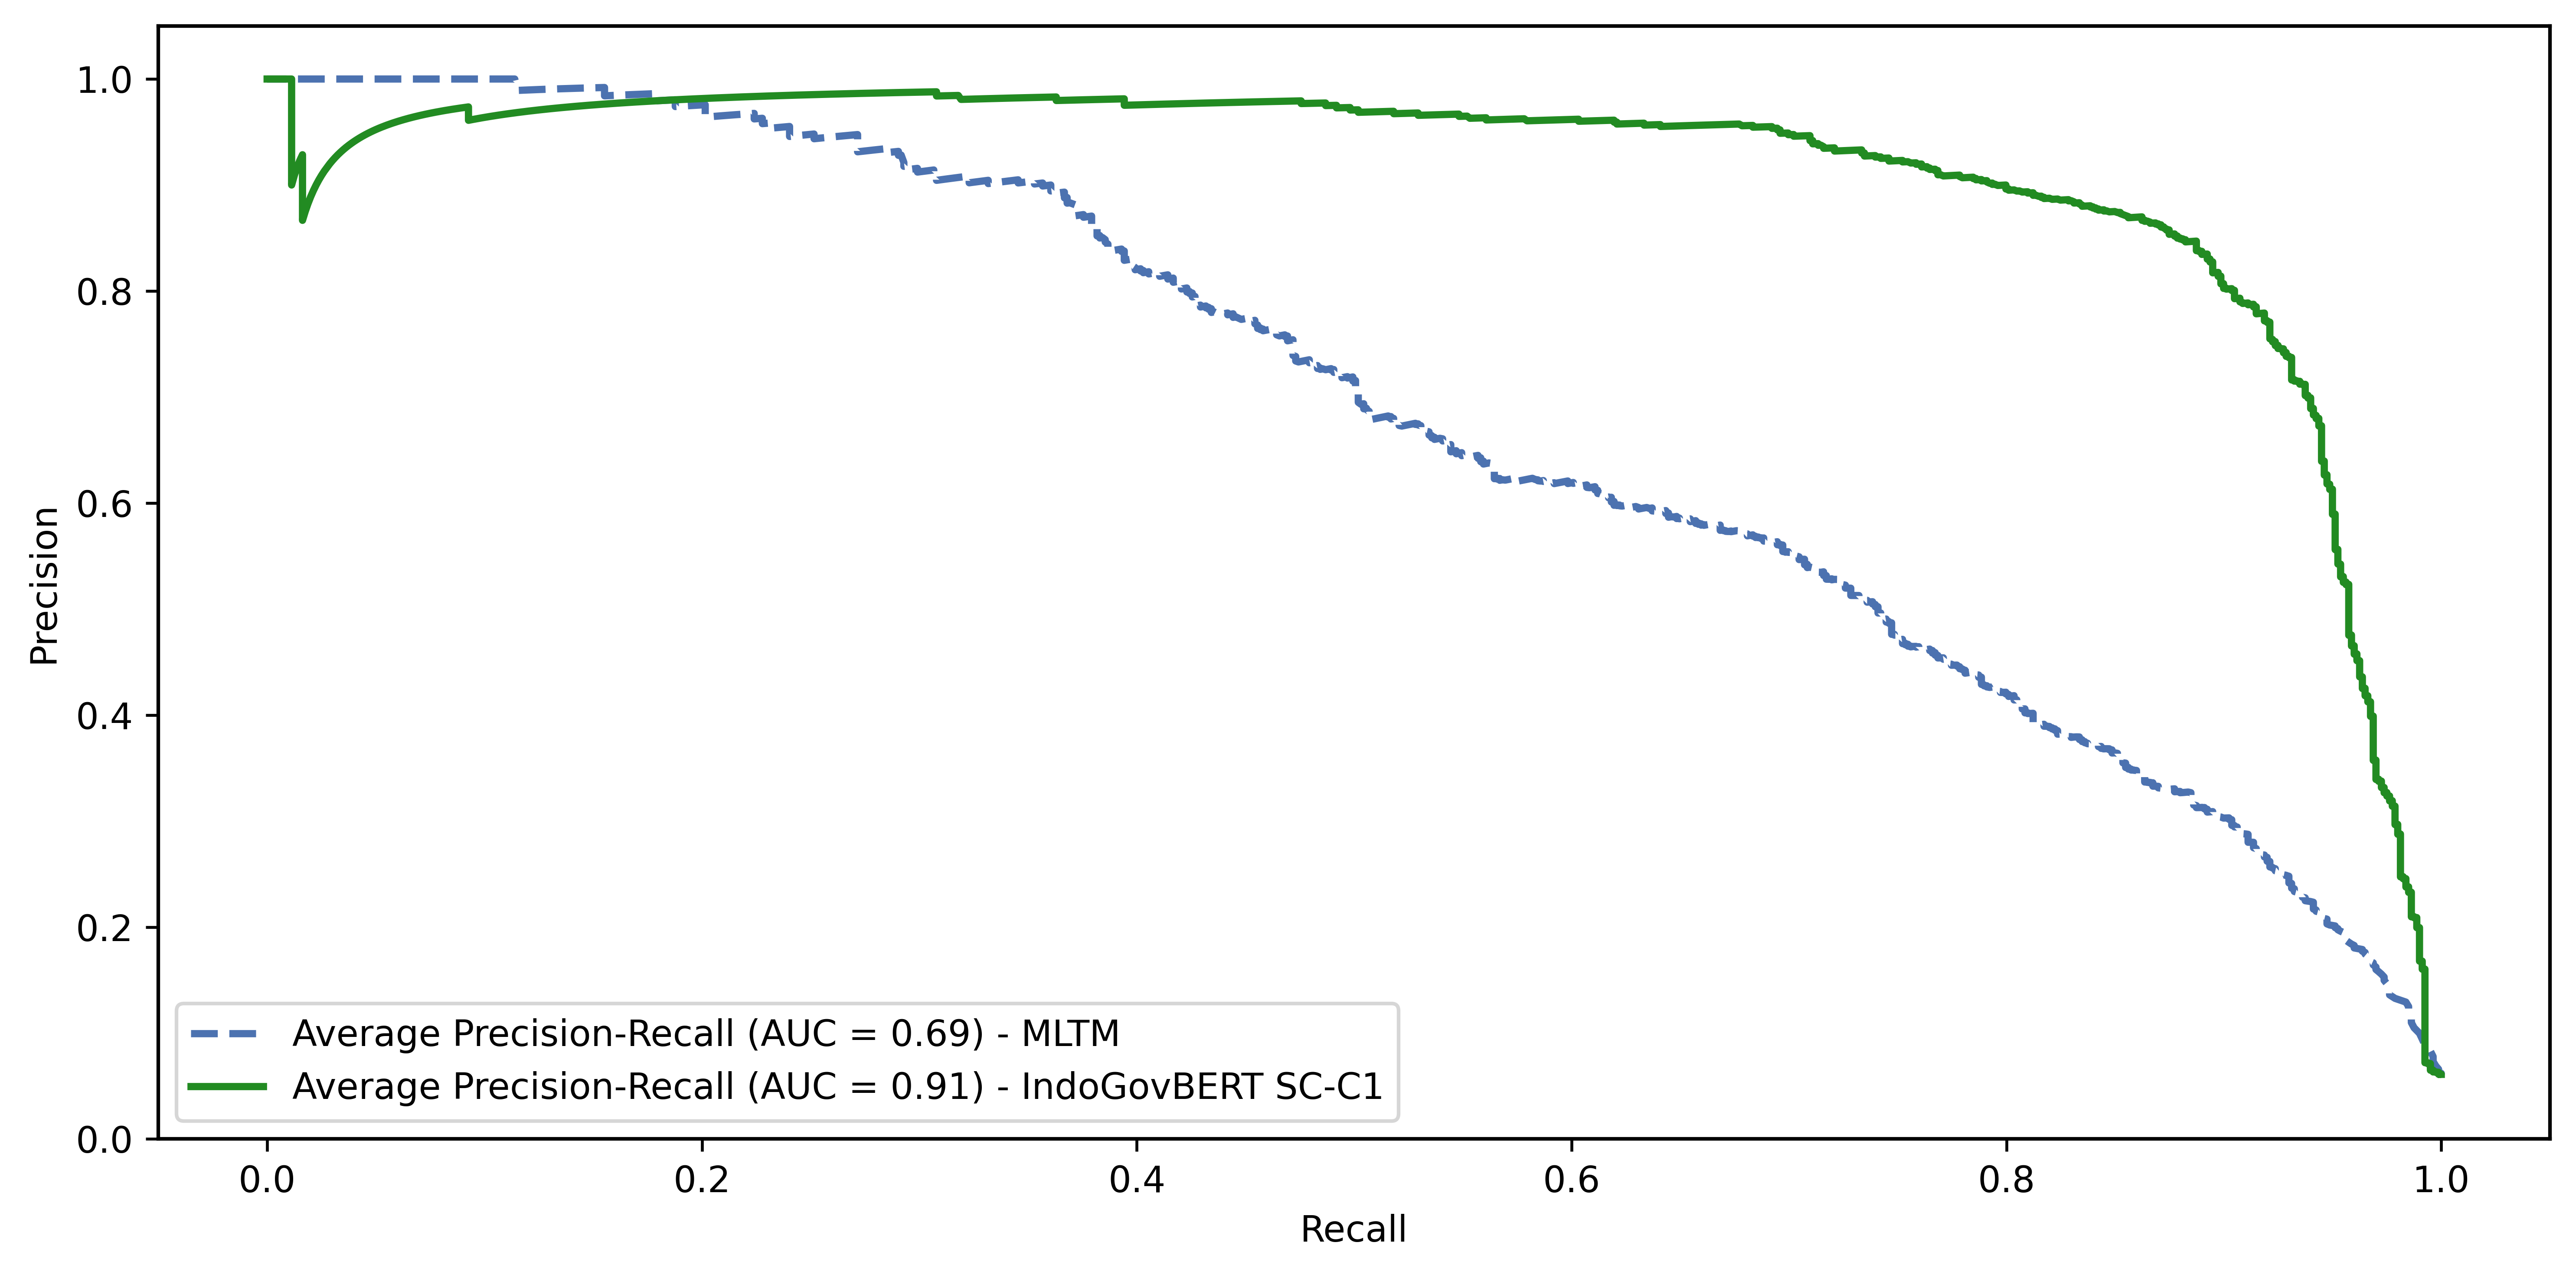

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have defined the variables for MLTM and BERT Precision-Recall data

# Calculate micro-average Precision-Recall and AUC for MLTM
precision_mltm_micro, recall_mltm_micro, _ = precision_recall_curve(true_labels.ravel(), predicted_probs.ravel())
pr_auc_mltm_micro = average_precision_score(true_labels, predicted_probs, average='micro')

precision_bert_micro, recall_bert_micro, _ = precision_recall_curve(true_labels.ravel(), bert_probs.ravel())
pr_auc_bert_micro = average_precision_score(true_labels, bert_probs, average='micro')


# Plot micro-average Precision-Recall curve for MLTM
plt.figure(figsize=(10, 5), dpi=600)
ax = plt.gca()
ax.set_facecolor('white')

plt.plot(
    recall_mltm_micro,
    precision_mltm_micro,
    label="Average Precision-Recall (AUC = {0:.2f}) - MLTM".format(pr_auc_mltm_micro),
    color="#4c72b0",
    linestyle="--",
    linewidth=2,
)

plt.plot(
    recall_bert_micro,
    precision_bert_micro,
    label="Average Precision-Recall (AUC = {0:.2f}) - IndoGovBERT SC-C1".format(pr_auc_bert_micro),
    color="forestgreen",
    linestyle="-",
    linewidth=2,
)

# Set the linewidth for all spines to 1 on ax
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.0)

plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")

# Adjust spacing between subplots
plt.tight_layout()

plt.grid(True, color='white')

# Show the plot
plt.show()


# Treshold

Micro Avg. AUC: 0.95


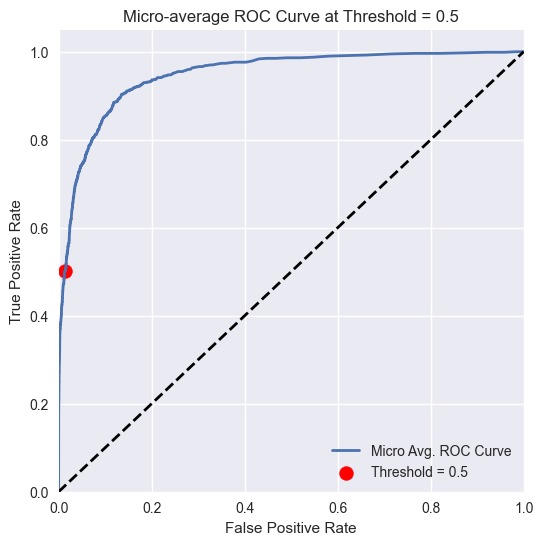

In [173]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Compute micro-average ROC curve and ROC area for MLTM
fpr_mltm_micro, tpr_mltm_micro, _ = roc_curve(true_labels.ravel(), predicted_probs.ravel())

# Set the threshold value
threshold = 0.5

# Find the index where the TPR is greater than or equal to the threshold
idx = np.argmax(tpr_mltm_micro >= threshold)

# Extract the FPR and TPR values for the selected threshold
selected_fpr = fpr_mltm_micro[idx]
selected_tpr = tpr_mltm_micro[idx]

# Plot ROC curve for the selected threshold
plt.figure(figsize=(6, 6))
plt.plot(
    fpr_mltm_micro,
    tpr_mltm_micro,
    label="Micro Avg. ROC Curve",
    linewidth=2,
)

plt.scatter(
    selected_fpr,
    selected_tpr,
    c='red',
    marker='o',
    label=f"Threshold = {threshold}",
    s=100,
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Micro-average ROC Curve at Threshold = {threshold}")
plt.legend(loc="lower right")

# Calculate ROC AUC for the entire ROC curve
roc_auc = auc(fpr_mltm_micro, tpr_mltm_micro)
print(f"Micro Avg. AUC: {roc_auc:.2f}")

# Show the plot
plt.show()


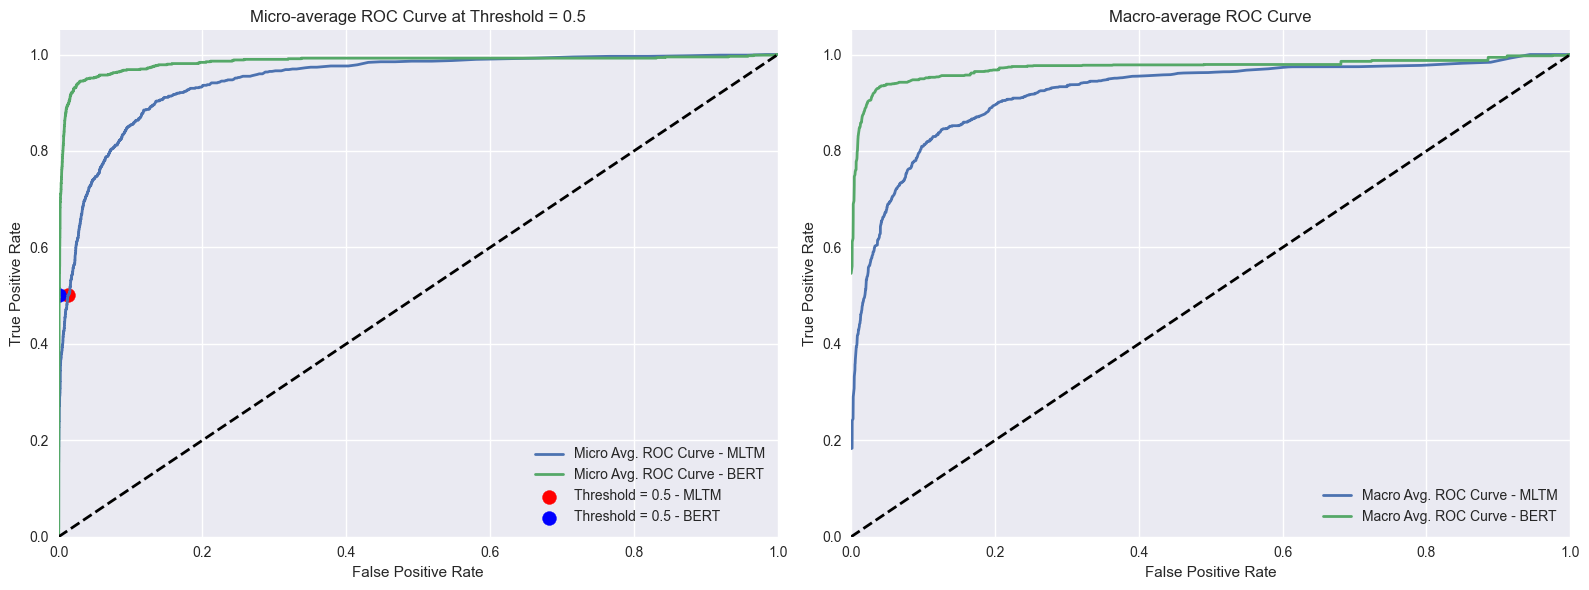

In [174]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Compute micro-average ROC curve and ROC area for MLTM
fpr_mltm_micro, tpr_mltm_micro, _ = roc_curve(true_labels.ravel(), predicted_probs.ravel())

# Set the threshold value for micro-average
threshold_micro = 0.5

# Find the index where the TPR is greater than or equal to the threshold for micro-average - MLTM
idx_micro_mltm = np.argmax(tpr_mltm_micro >= threshold_micro)

# Extract the FPR and TPR values for the selected threshold for micro-average - MLTM
selected_fpr_micro_mltm = fpr_mltm_micro[idx_micro_mltm]
selected_tpr_micro_mltm = tpr_mltm_micro[idx_micro_mltm]

# Compute micro-average ROC curve and ROC area for BERT
fpr_bert_micro, tpr_bert_micro, _ = roc_curve(true_labels.ravel(), bert_probs.ravel())

# Find the index where the TPR is greater than or equal to the threshold for micro-average - BERT
idx_micro_bert = np.argmax(tpr_bert_micro >= threshold_micro)

# Extract the FPR and TPR values for the selected threshold for micro-average - BERT
selected_fpr_micro_bert = fpr_bert_micro[idx_micro_bert]
selected_tpr_micro_bert = tpr_bert_micro[idx_micro_bert]

# Compute macro-average ROC curve and ROC area for MLTM
n_classes_mltm = true_labels.shape[1]
all_fpr_mltm_macro = []
all_tpr_mltm_macro = []

for i in range(n_classes_mltm):
    fpr, tpr, _ = roc_curve(true_labels[:, i], predicted_probs[:, i])
    all_fpr_mltm_macro.append(fpr)
    all_tpr_mltm_macro.append(tpr)

# Interpolate all ROC curves to create a common set of points for macro-average calculation for MLTM
mean_fpr_mltm_macro = np.unique(np.concatenate(all_fpr_mltm_macro))
mean_tpr_mltm_macro = np.zeros_like(mean_fpr_mltm_macro)

for i in range(n_classes_mltm):
    mean_tpr_mltm_macro += np.interp(mean_fpr_mltm_macro, all_fpr_mltm_macro[i], all_tpr_mltm_macro[i])

mean_tpr_mltm_macro /= n_classes_mltm

# Calculate macro-average ROC AUC score for MLTM
roc_auc_mltm_macro = auc(mean_fpr_mltm_macro, mean_tpr_mltm_macro)

# Compute macro-average ROC curve and ROC area for BERT
n_classes_bert = true_labels.shape[1]
all_fpr_bert_macro = []
all_tpr_bert_macro = []

for i in range(n_classes_bert):
    fpr, tpr, _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    all_fpr_bert_macro.append(fpr)
    all_tpr_bert_macro.append(tpr)

# Interpolate all ROC curves to create a common set of points for macro-average calculation for BERT
mean_fpr_bert_macro = np.unique(np.concatenate(all_fpr_bert_macro))
mean_tpr_bert_macro = np.zeros_like(mean_fpr_bert_macro)

for i in range(n_classes_bert):
    mean_tpr_bert_macro += np.interp(mean_fpr_bert_macro, all_fpr_bert_macro[i], all_tpr_bert_macro[i])

mean_tpr_bert_macro /= n_classes_bert

# Calculate macro-average ROC AUC score for BERT
roc_auc_bert_macro = auc(mean_fpr_bert_macro, mean_tpr_bert_macro)

# Create a figure with two subplots side by side
plt.figure(figsize=(16, 6))

# Plot micro-average ROC curve for MLTM and BERT on the left side
plt.subplot(1, 2, 1)
plt.plot(
    fpr_mltm_micro,
    tpr_mltm_micro,
    label="Micro Avg. ROC Curve - MLTM",
    linewidth=2,
)

plt.plot(
    fpr_bert_micro,
    tpr_bert_micro,
    label="Micro Avg. ROC Curve - BERT",
    linewidth=2,
)

plt.scatter(
    selected_fpr_micro_mltm,
    selected_tpr_micro_mltm,
    c='red',
    marker='o',
    label=f"Threshold = {threshold_micro} - MLTM",
    s=100,
)

plt.scatter(
    selected_fpr_micro_bert,
    selected_tpr_micro_bert,
    c='blue',
    marker='o',
    label=f"Threshold = {threshold_micro} - BERT",
    s=100,
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Micro-average ROC Curve at Threshold = {threshold_micro}")
plt.legend(loc="lower right")

# Plot macro-average ROC curve for MLTM and BERT on the right side
plt.subplot(1, 2, 2)
plt.plot(
    mean_fpr_mltm_macro,
    mean_tpr_mltm_macro,
    label="Macro Avg. ROC Curve - MLTM",
    linewidth=2,
)

plt.plot(
    mean_fpr_bert_macro,
    mean_tpr_bert_macro,
    label="Macro Avg. ROC Curve - BERT",
    linewidth=2,
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-average ROC Curve")
plt.legend(loc="lower right")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Testing

https://sites.google.com/site/nttrungmtwiki/home/it/data-science---python/multiclass-and-multilabel-roc-curve-plotting

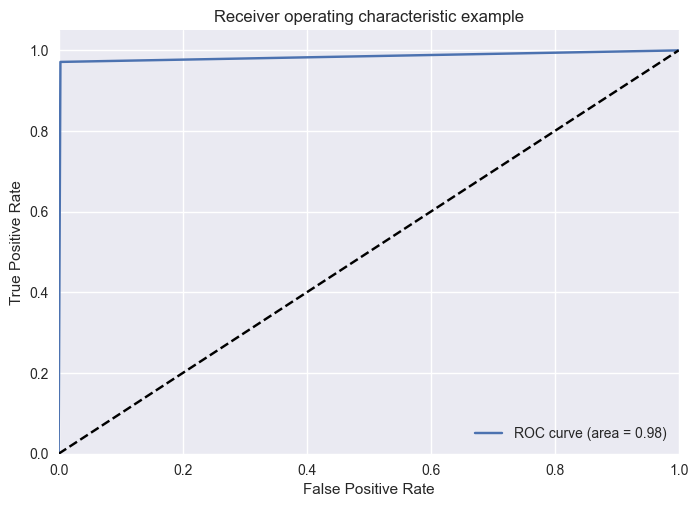

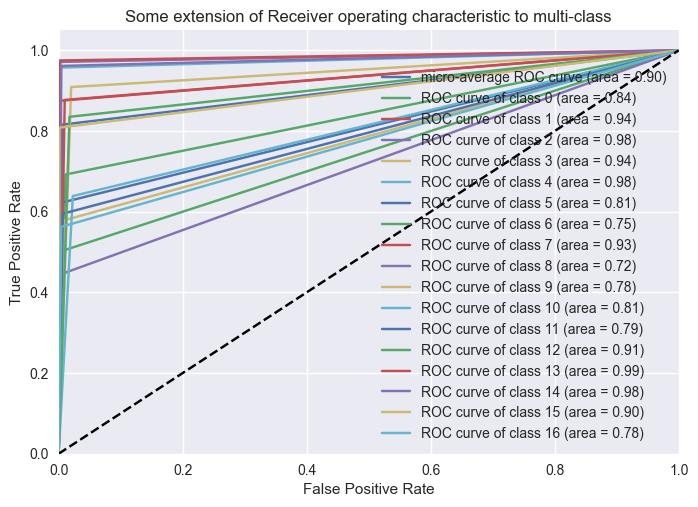

In [175]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], bert_labels[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), bert_labels.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Using Probabilities

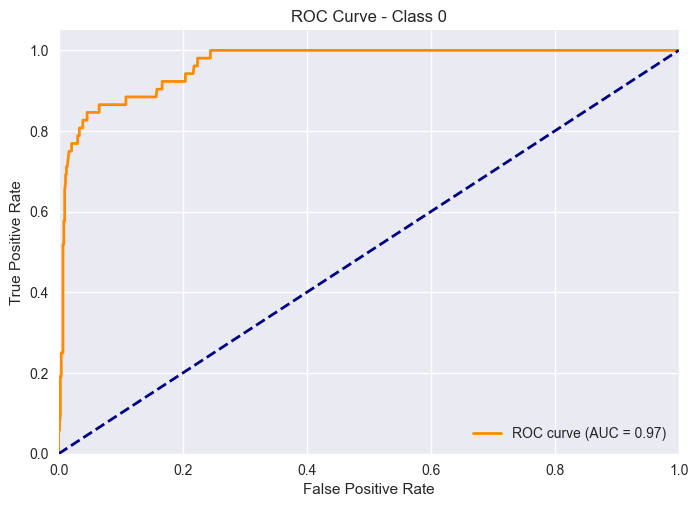

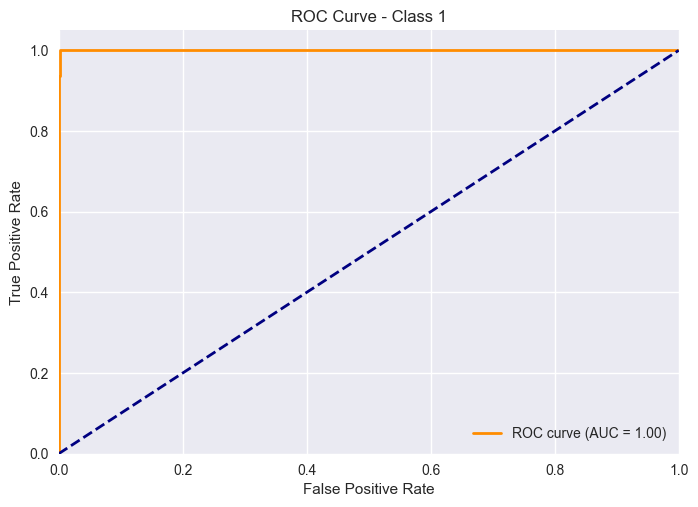

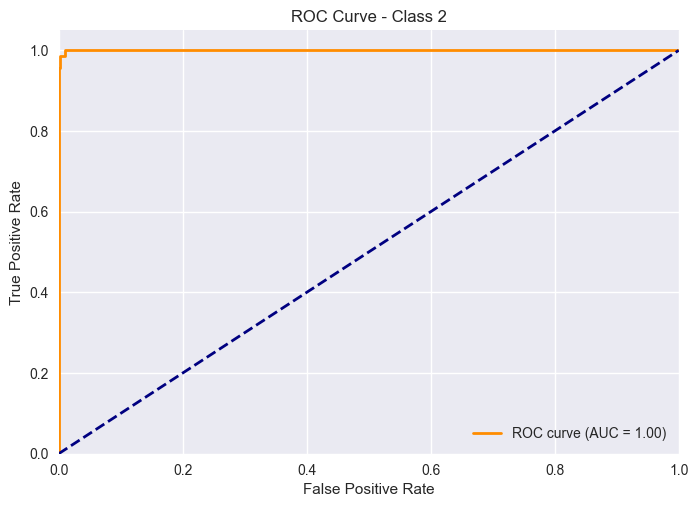

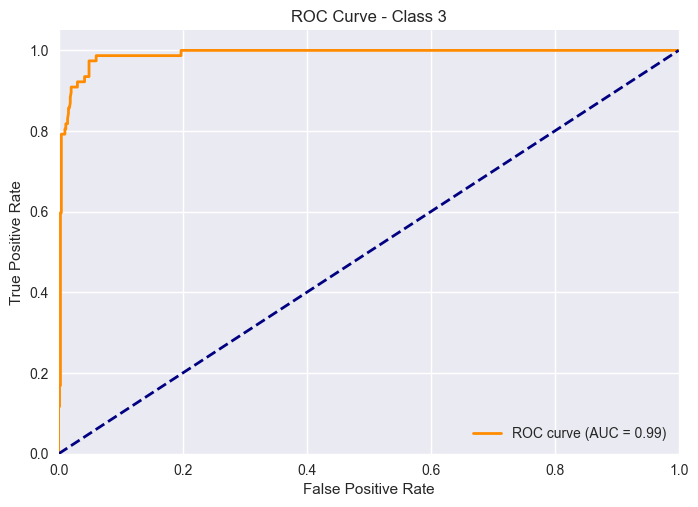

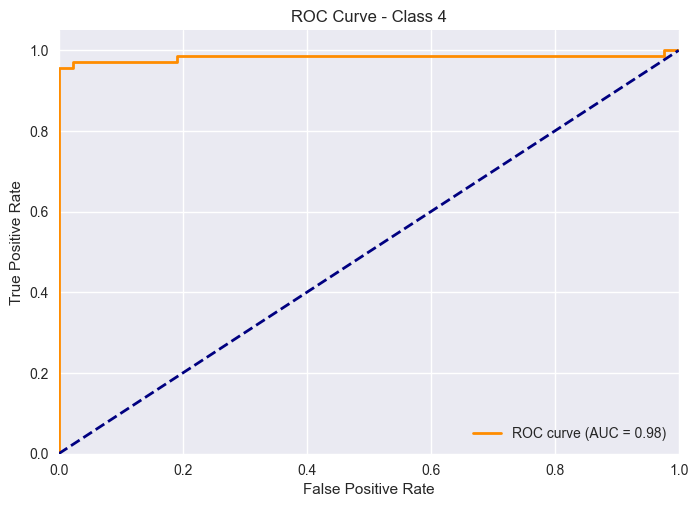

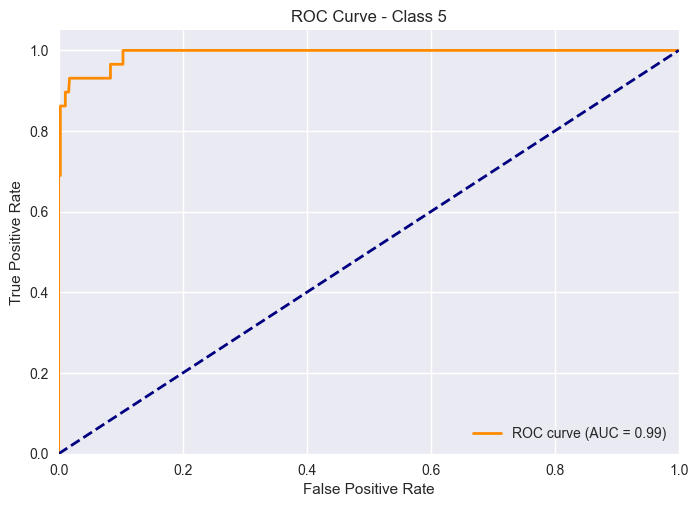

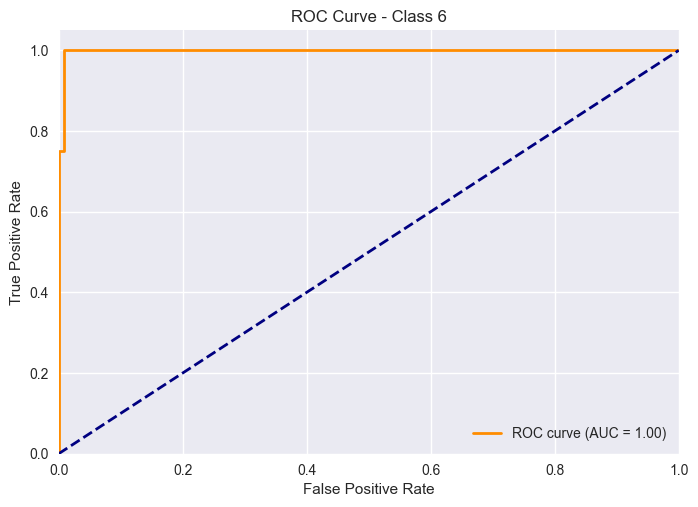

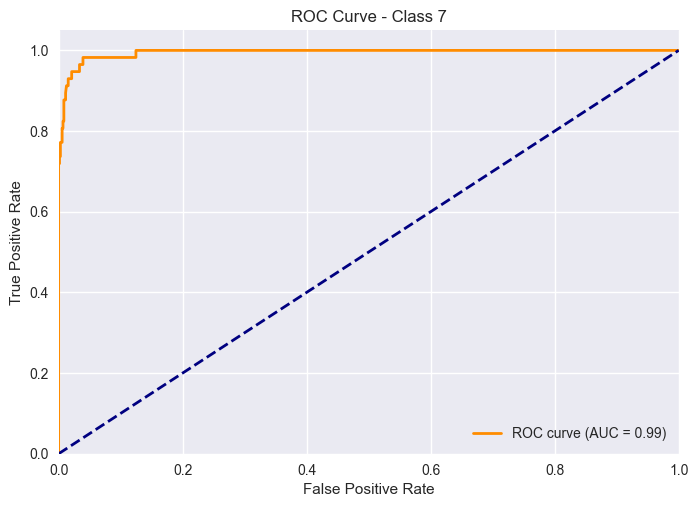

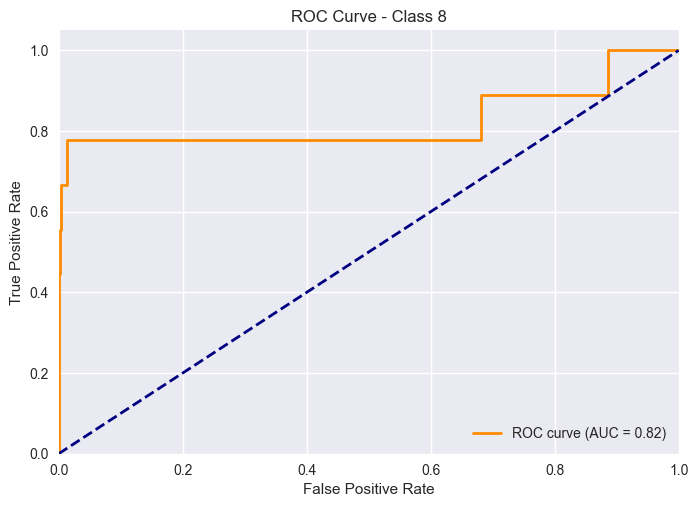

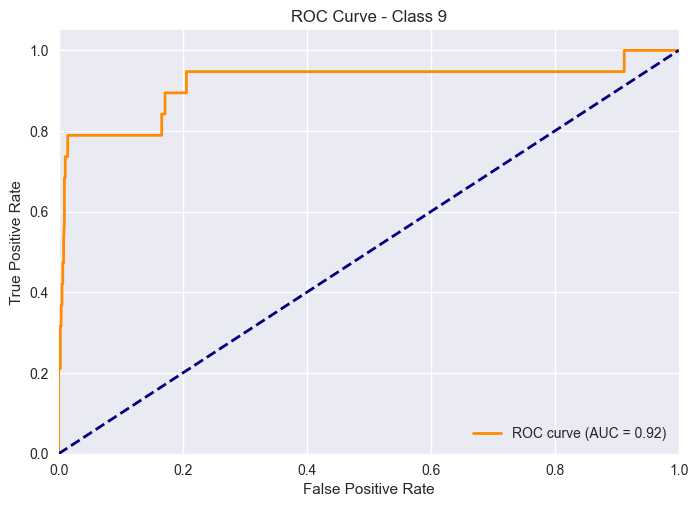

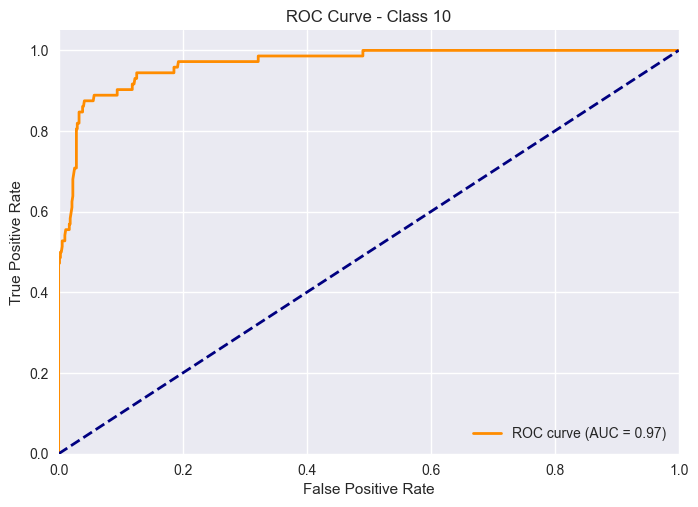

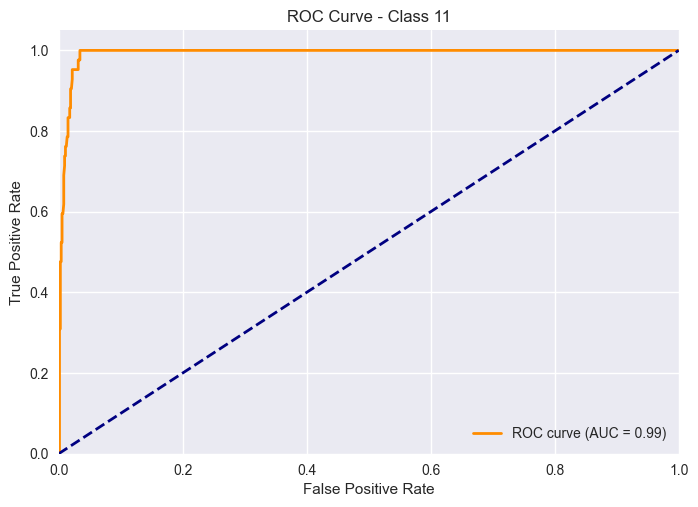

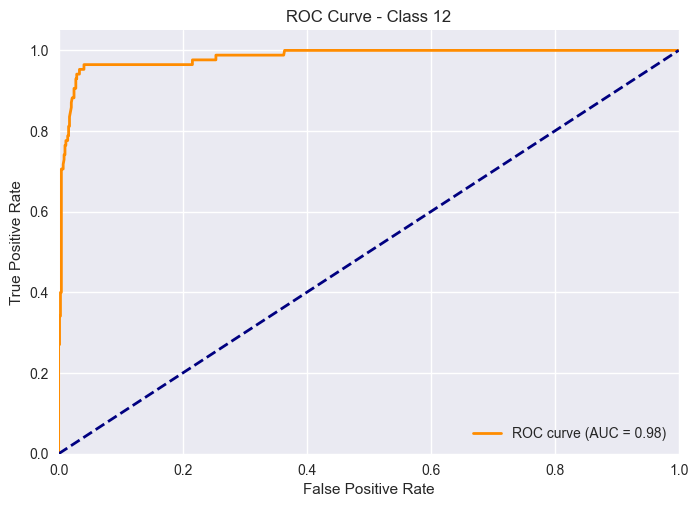

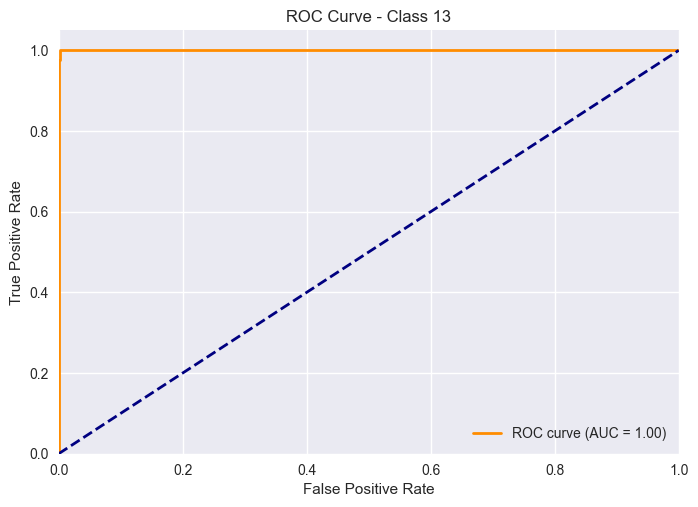

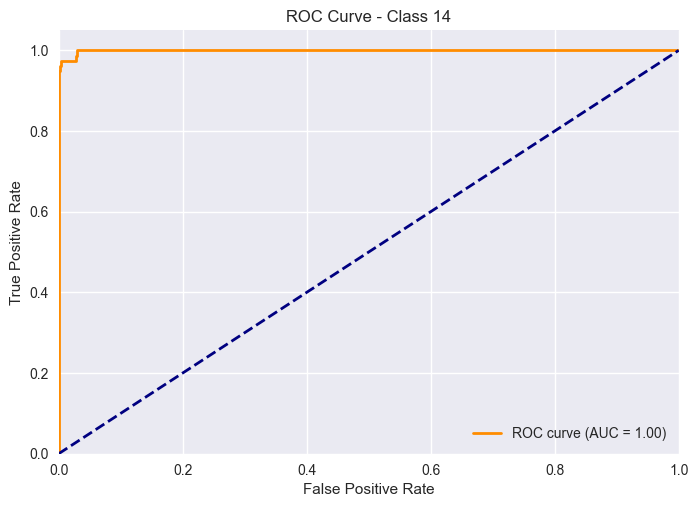

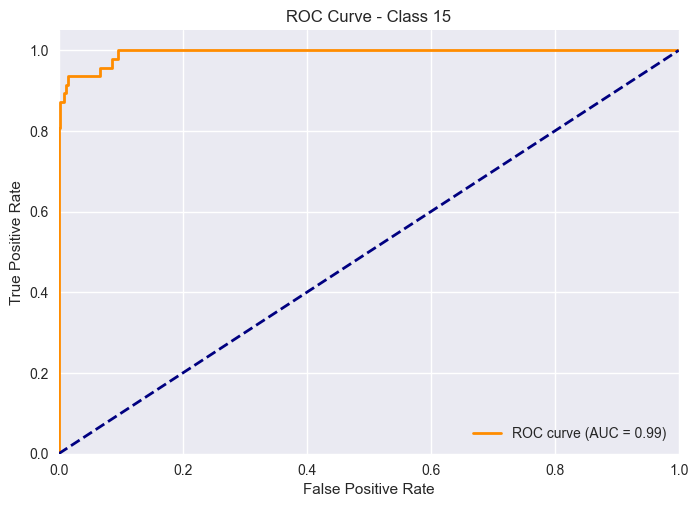

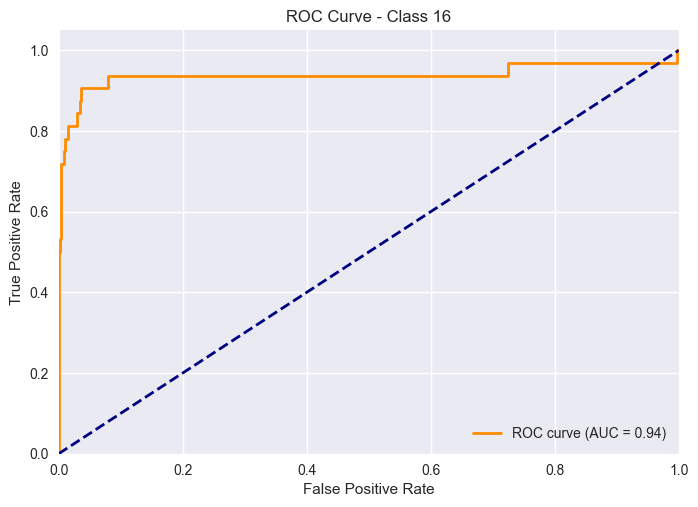

In [176]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# true_labels: Ground truth binary labels (0 or 1) for each class
# predicted_probs: Predicted probabilities for each class

# Compute ROC curve and ROC AUC score for each class
n_classes = true_labels.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], bert_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Class {i}')
    plt.legend(loc="lower right")
    plt.show()


# Mas Valent

In [177]:
import numpy as np

# Define the threshold (e.g., 0.5)
threshold = 0.5

# Your predicted probabilities (replace this with your actual predicted probabilities)
predicted_probs = np.array([0.7, 0.3, 0.6, 0.4, 0.8])

# Apply the thresholding
predicted_binary = predicted_probs.copy()  # Create a copy to avoid modifying the original array
predicted_binary[predicted_binary < threshold] = 0  # Set values below the threshold to 0

# Print the result
print(predicted_binary)

[0.7 0.  0.6 0.  0.8]


In [178]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

print(pd.DataFrame(X))
print(pd.Series(y))

           0         1         2         3         4         5         6   \
0   -0.258203  1.019808  1.524563  0.617243  0.148243  0.744111 -0.363963   
1   -0.458166  0.828728 -0.656965 -0.056297  0.254895 -0.018241  0.313829   
2   -0.387378  0.761818 -1.310351 -0.351663 -0.130643 -0.641420  0.152001   
3   -2.394585 -0.036724  1.361228 -0.371470  1.871835 -1.226815  0.770733   
4    0.258229 -1.600952  1.101282  1.659578  0.927923 -0.093182 -1.778309   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.724879  0.281545 -0.362035 -2.602418  0.699501 -0.328376  0.383521   
996  2.085897  0.461640  0.372497 -1.838814  0.024923 -0.710831 -0.945424   
997 -0.547793 -0.674539 -0.834644  1.050191 -0.797763  0.699879 -0.943583   
998  0.559619 -0.625025  1.404538  0.593826 -0.270234 -0.519678 -1.407141   
999 -1.424876  0.527146  0.157864 -0.926648 -0.801353  1.825411  0.999557   

           7         8         9         10        11        12        13  

In [179]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [180]:
y_test

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [181]:
bert_probs

array([[0.011675, 0.003292, 0.031514, ..., 0.0095  , 0.032538, 0.002687],
       [0.006089, 0.00206 , 0.004427, ..., 0.018397, 0.035969, 0.001846],
       [0.007552, 0.008134, 0.01209 , ..., 0.010181, 0.007378, 0.012864],
       ...,
       [0.007881, 0.008685, 0.007569, ..., 0.008026, 0.00605 , 0.007676],
       [0.011666, 0.007412, 0.007757, ..., 0.007492, 0.005398, 0.006138],
       [0.011901, 0.005907, 0.007794, ..., 0.006784, 0.005407, 0.00561 ]])

In [182]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [183]:
pred_prob1[:,1][100]

0.009782163711238518

In [184]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

In [185]:
print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157


/tmp/ipykernel_777701/1489870747.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


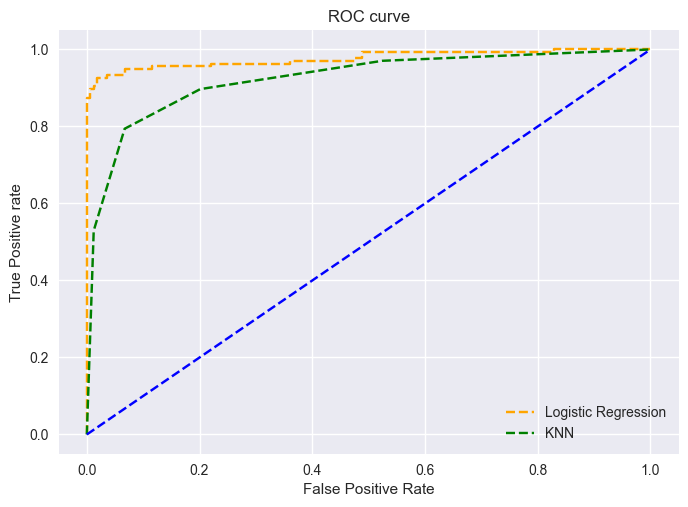

In [186]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [307]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"  # You can choose a different BERT model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def get_bert_embeddings(texts):
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling over tokens
    return embeddings.detach().numpy()

def calculate_cosine_similarity(embeddings1, embeddings2):
    similarities = cosine_similarity(embeddings1, embeddings2)
    return similarities

def determine_threshold(similarities, threshold_step=0.1):
    thresholds = np.arange(0, 1.1, threshold_step)
    best_threshold = 0
    best_f1_score = 0
    
    for threshold in thresholds:
        predictions = similarities > threshold
        # Assuming you have ground truth labels for similarity
        # Compare predictions with ground truth and calculate F1 score
        # f1_score = calculate_f1_score(predictions, ground_truth_labels)
        
        # For simplicity, let's assume a dummy F1 score (replace with your actual calculation)
        f1_score = 0.8 * threshold + 0.2  # Replace with actual F1 score calculation
        
        if f1_score > best_f1_score:
            best_f1_score = f1_score
            best_threshold = threshold
    
    return best_threshold

# Example usage
dataset1 = ["Text 1A", "Text 1B", "Text 1C"]
dataset2 = ["Text 2A", "Text 2B", "Text 2C"]

embeddings1 = get_bert_embeddings(dataset1)
embeddings2 = get_bert_embeddings(dataset2)

similarities = calculate_cosine_similarity(embeddings1, embeddings2)
best_threshold = determine_threshold(similarities)

print("Best Similarity Threshold:", best_threshold)


2023-11-16 14:30:46.050721: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-16 14:30:47.679725: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from

Best Similarity Threshold: 1.0


In [308]:
similarities

array([[0.9806588 , 0.78676796, 0.8384261 ],
       [0.9256599 , 0.74024475, 0.79276764],
       [0.8118814 , 0.87285566, 0.9509351 ]], dtype=float32)